# Importing all the Libraries

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_selection import RFE
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

### Loading Data Set

In [2]:
telecom_data = pd.read_csv("telecom_churn_data.csv")
telecom_data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
#Shape of Data Set
telecom_data.shape


(99999, 226)

In [4]:
#List of columns
telecom_data.columns

Index(['mobile_number', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou',
       'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7',
       'last_date_of_month_8', 'last_date_of_month_9', 'arpu_6',
       ...
       'sachet_3g_9', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'fb_user_9',
       'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'],
      dtype='object', length=226)

### Filtering High Value Customer

In [5]:
# Find columns with total recharge info
tot_rech_cols = [col for col in telecom_data.columns if 'total_rech_' in col]
print(tot_rech_cols)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_num_9', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_rech_amt_9', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9']


In [6]:
#Derive Total Data Recharge Amounts

telecom_data["total_rech_data_amt_6"] = telecom_data["total_rech_data_6"]  * telecom_data['av_rech_amt_data_6']
telecom_data["total_rech_data_amt_7"] = telecom_data["total_rech_data_7"]  * telecom_data['av_rech_amt_data_7']
telecom_data["total_rech_data_amt_8"] = telecom_data["total_rech_data_8"]  * telecom_data['av_rech_amt_data_8']
telecom_data["total_rech_data_amt_9"] = telecom_data["total_rech_data_9"]  * telecom_data['av_rech_amt_data_9']


In [7]:
telecom_data.shape


(99999, 230)

In [8]:
# Drop total_rech_data_* and av_rech_amt_data_*
drop_col = ["total_rech_data_6", "total_rech_data_7", "total_rech_data_8", "total_rech_data_9", 
                'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9']
telecom_data.drop(drop_col, axis=1, inplace=True)



In [9]:
#Average of Recharge Amount in 6th and 7th Month
av_rech_amt_6n7 = (telecom_data["total_rech_amt_6"].fillna(0) + telecom_data["total_rech_data_amt_6"].fillna(0) + 
telecom_data["total_rech_amt_7"].fillna(0) + telecom_data["total_rech_data_amt_7"].fillna(0))/2.0

#70th Percentile of Avg Recharge Amount
pc70_6n7 = np.percentile(av_rech_amt_6n7, 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', pc70_6n7)

data_high_val_cust = telecom_data[av_rech_amt_6n7 >= pc70_6n7]
print('Dataframe Shape after Filtering HIgh Value Customers: ', data_high_val_cust.shape)


70 percentile of 6th and 7th months avg recharge amount:  478.0
Dataframe Shape after Filtering HIgh Value Customers:  (30001, 222)


### Data Cleaning and EDA

In [10]:
# Checking null value 
telecom_data.isnull().sum()*100/len(telecom_data.index)


mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

##### Removing Data which has only 1 unique Value


In [11]:
#List of columns with only 1 unqiue value
col_list = data_high_val_cust.loc[:,data_high_val_cust.apply(pd.Series.nunique) == 1]
col_list.head(5)


,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9
0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN
7,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,NaN,0.0,0.0,0.0,NaN
8,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
21,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
#Remove Columns with only 1 unique value
data_high_val_cust = data_high_val_cust.loc[:,data_high_val_cust.apply(pd.Series.nunique) != 1]
data_high_val_cust.shape

(30001, 206)

In [13]:
# aug_vbc_3g jul_vbc_3g jun_vbc_3g sep_vbc_3g

data_high_val_cust.rename(columns={'jun_vbc_3g': 'vbc_3g_6', 'jul_vbc_3g': 'vbc_3g_7', 'aug_vbc_3g': 'vbc_3g_8', 'sep_vbc_3g': 'vbc_3g_9'}, inplace=True)

In [14]:
# Checking Missing values the column which have null value more than 30%
columns = data_high_val_cust.columns
percent_missing = data_high_val_cust.isnull().sum() * 100 / len(data_high_val_cust)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing': percent_missing})

drop_col = missing_value_df.loc[(missing_value_df["column_name"].str.contains('_9')==False) & (missing_value_df["percent_missing"] > 30.0)]["column_name"]
drop_col


date_of_last_rech_data_6    date_of_last_rech_data_6
date_of_last_rech_data_7    date_of_last_rech_data_7
date_of_last_rech_data_8    date_of_last_rech_data_8
max_rech_data_6                      max_rech_data_6
max_rech_data_7                      max_rech_data_7
max_rech_data_8                      max_rech_data_8
count_rech_2g_6                      count_rech_2g_6
count_rech_2g_7                      count_rech_2g_7
count_rech_2g_8                      count_rech_2g_8
count_rech_3g_6                      count_rech_3g_6
count_rech_3g_7                      count_rech_3g_7
count_rech_3g_8                      count_rech_3g_8
arpu_3g_6                                  arpu_3g_6
arpu_3g_7                                  arpu_3g_7
arpu_3g_8                                  arpu_3g_8
arpu_2g_6                                  arpu_2g_6
arpu_2g_7                                  arpu_2g_7
arpu_2g_8                                  arpu_2g_8
night_pck_user_6                    night_pck_

In [15]:
data_high_val_cust.drop(drop_col, axis=1, inplace=True)
data_high_val_cust.shape


(30001, 179)

In [16]:
#Drop Rows with all Null Values
data_high_val_cust = data_high_val_cust.dropna(how='all',axis=0) 
data_high_val_cust.shape

(30001, 179)

#### Skewness check of colums



In [17]:
# We will check skewness of ech column
for col_name in data_high_val_cust.columns:
    if (len(data_high_val_cust[col_name].unique()) <= 8):
        print(data_high_val_cust[col_name].value_counts())
        print(f"\n{35 * '-'}")

0.0    14952
1.0      268
Name: night_pck_user_9, dtype: int64

-----------------------------------
0    25394
1     4021
2      551
3       28
4        7
Name: monthly_2g_6, dtype: int64

-----------------------------------
0    25241
1     4071
2      649
3       33
4        5
5        2
Name: monthly_2g_7, dtype: int64

-----------------------------------
0    25854
1     3737
2      370
3       30
4        8
5        2
Name: monthly_2g_8, dtype: int64

-----------------------------------
0    26445
1     3175
2      346
3       30
4        5
Name: monthly_2g_9, dtype: int64

-----------------------------------
1.0    13564
0.0     1656
Name: fb_user_9, dtype: int64

-----------------------------------


### Drop Highly Correlated Columns


In [18]:
#Find Highly correlated data and drop Highly Correlated Columns
cor = data_high_val_cust.corr()
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.60) | (cor < -0.60)].sort_values()

monthly_3g_6           vol_3g_mb_6         0.601308
total_ic_mou_7         loc_ic_t2t_mou_7    0.601684
arpu_2g_9              count_rech_3g_9     0.602386
total_og_mou_8         onnet_mou_9         0.603450
total_rech_amt_8       arpu_6              0.603673
roam_og_mou_8          roam_og_mou_7       0.604862
offnet_mou_8           offnet_mou_6        0.604877
total_ic_mou_8         loc_ic_t2t_mou_8    0.605243
std_ic_mou_6           std_ic_t2m_mou_7    0.606225
std_og_mou_9           std_og_t2m_mou_8    0.606539
arpu_2g_9              vol_3g_mb_8         0.606779
std_ic_mou_7           std_ic_t2m_mou_8    0.606866
loc_og_mou_6           loc_og_t2t_mou_7    0.607059
vbc_3g_8               vol_3g_mb_8         0.607689
std_og_mou_8           std_og_t2m_mou_9    0.608170
std_og_mou_9           offnet_mou_9        0.608690
total_rech_amt_8       total_rech_amt_6    0.609306
total_og_mou_6         std_og_t2t_mou_6    0.610417
total_rech_amt_6       arpu_8              0.610687
std_og_mou_7

In [19]:
#List of columns to drop
drop_col_list = ['loc_og_t2m_mou_6','std_og_t2t_mou_6','std_og_t2t_mou_7','std_og_t2t_mou_8','std_og_t2t_mou_9','std_og_t2m_mou_6',
                'std_og_t2m_mou_7','std_og_t2m_mou_8','std_og_t2m_mou_9','total_og_mou_6','total_og_mou_7','total_og_mou_8',
                'loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','loc_ic_t2t_mou_9','loc_ic_t2m_mou_6','loc_ic_t2m_mou_7','loc_ic_t2m_mou_8','loc_ic_t2m_mou_9',
                'std_ic_t2m_mou_6','std_ic_t2m_mou_7','std_ic_t2m_mou_8','std_ic_t2m_mou_9','total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                'total_rech_amt_6','total_rech_amt_7','total_rech_amt_8','total_rech_amt_9','arpu_2g_9','count_rech_2g_9','count_rech_3g_9','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8',
                'loc_og_t2t_mou_6','loc_og_t2t_mou_7','loc_og_t2t_mou_8','loc_og_t2t_mou_9','loc_og_t2f_mou_6','loc_og_t2f_mou_7','loc_og_t2f_mou_8','loc_og_t2f_mou_9',
                'loc_og_t2m_mou_6','loc_og_t2m_mou_7','loc_og_t2m_mou_8','loc_og_t2m_mou_9','loc_ic_t2f_mou_6','loc_ic_t2f_mou_7','loc_ic_t2f_mou_8','loc_ic_t2f_mou_9',
                'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8']
                 
data_high_val_cust.drop(drop_col_list, axis=1, inplace=True)

#checking shape of the dataset
data_high_val_cust.shape


(30001, 124)

##### Tag Churner

In [20]:
data_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00
8,34.91,142.18,0.00,0.00
21,252.61,1031.53,0.00,0.00
23,127.48,127.63,13.93,314.74


In [21]:
#churned customers (churn=1, else 0) i.e we are setting customer for 1 who left and those who exist is 0
data_high_val_cust['churn'] = np.where(data_high_val_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0,1,0)

In [23]:
data_high_val_cust['churn'].head()

0     1
7     1
8     0
21    0
23    0
Name: churn, dtype: int32

#### Dropping all month 9 data

In [24]:
drop_cols = [col for col in data_high_val_cust.columns if '_9' in col]
print(drop_cols)

data_high_val_cust.drop(drop_cols, axis=1, inplace=True)

data_high_val_cust.shape


['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2f_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2f_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'date_of_last_rech_data_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'arpu_3g_9', 'night_pck_user_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'fb_user_9', 'vbc_3g_9', 'total_rech_data_amt_9']


(30001, 87)

In [29]:
# Function to create dist plot
def ColumnDistribution(telecom_data, nGraphShown, nGraphPerRow):
    nunique = telecom_data.nunique()
    telecom_data = telecom_data[[col for col in telecom_data if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = telecom_data.shape
    columnNames = list(telecom_data)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = telecom_data.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [26]:
# function to create Correlation matrix
def CorrelationMatrix(telecom_data, graphWidth):
    filename = "Telecom Churn"
    telecom_data = telecom_data.dropna('columns') # drop columns with NaN
    telecom_data = telecom_data[[col for col in telecom_data if telecom_data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if telecom_data.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({telecom_data.shape[1]}) is less than 2')
        return
    corr = telecom_data.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [27]:
# Scatter and density plots
def ScatterMatrix(telecom_data, plotSize, textSize):
    telecom_data = telecom_data.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    telecom_data = telecom_data.dropna('columns')
    telecom_data = telecom_data[[col for col in telecom_data if telecom_data[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(telecom_data)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    telecom_data = telecom_data[columnNames]
    ax = pd.plotting.scatter_matrix(telecom_data, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = telecom_data.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


###  Histogram/Bar Graph of sampled columns:

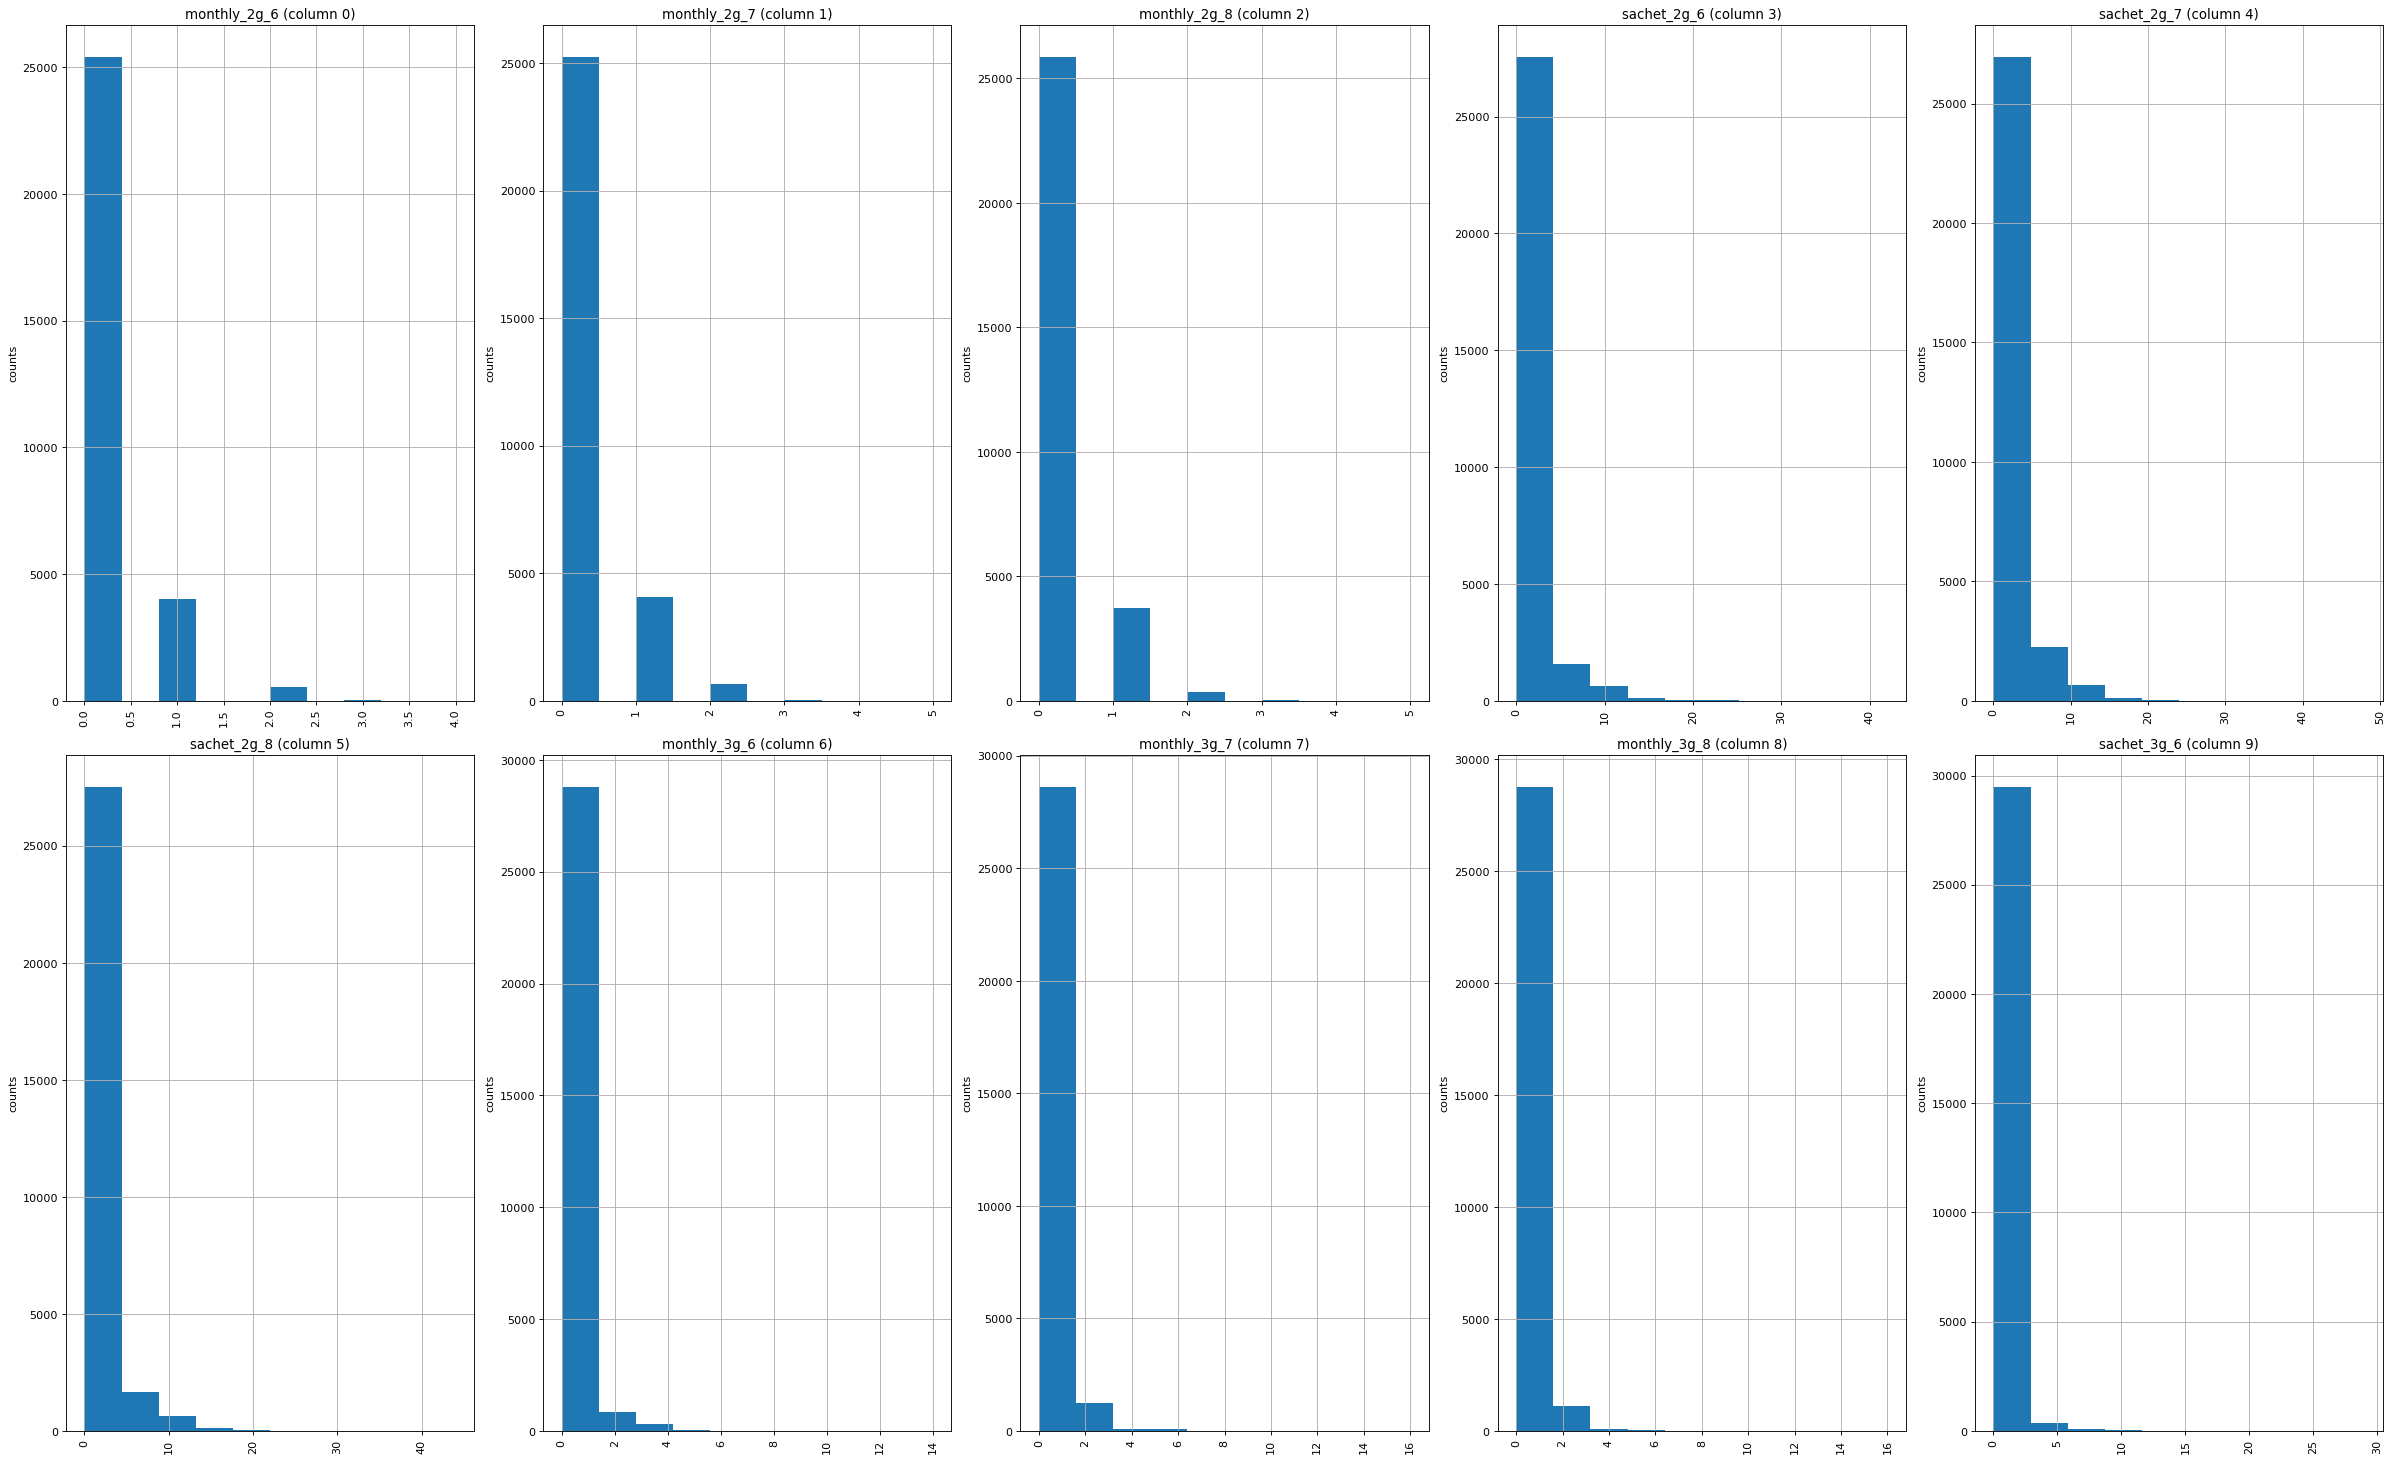

In [30]:
# Distribution plot of high value customer
ColumnDistribution(data_high_val_cust, 10, 5)

### Checking Correlation Matrix

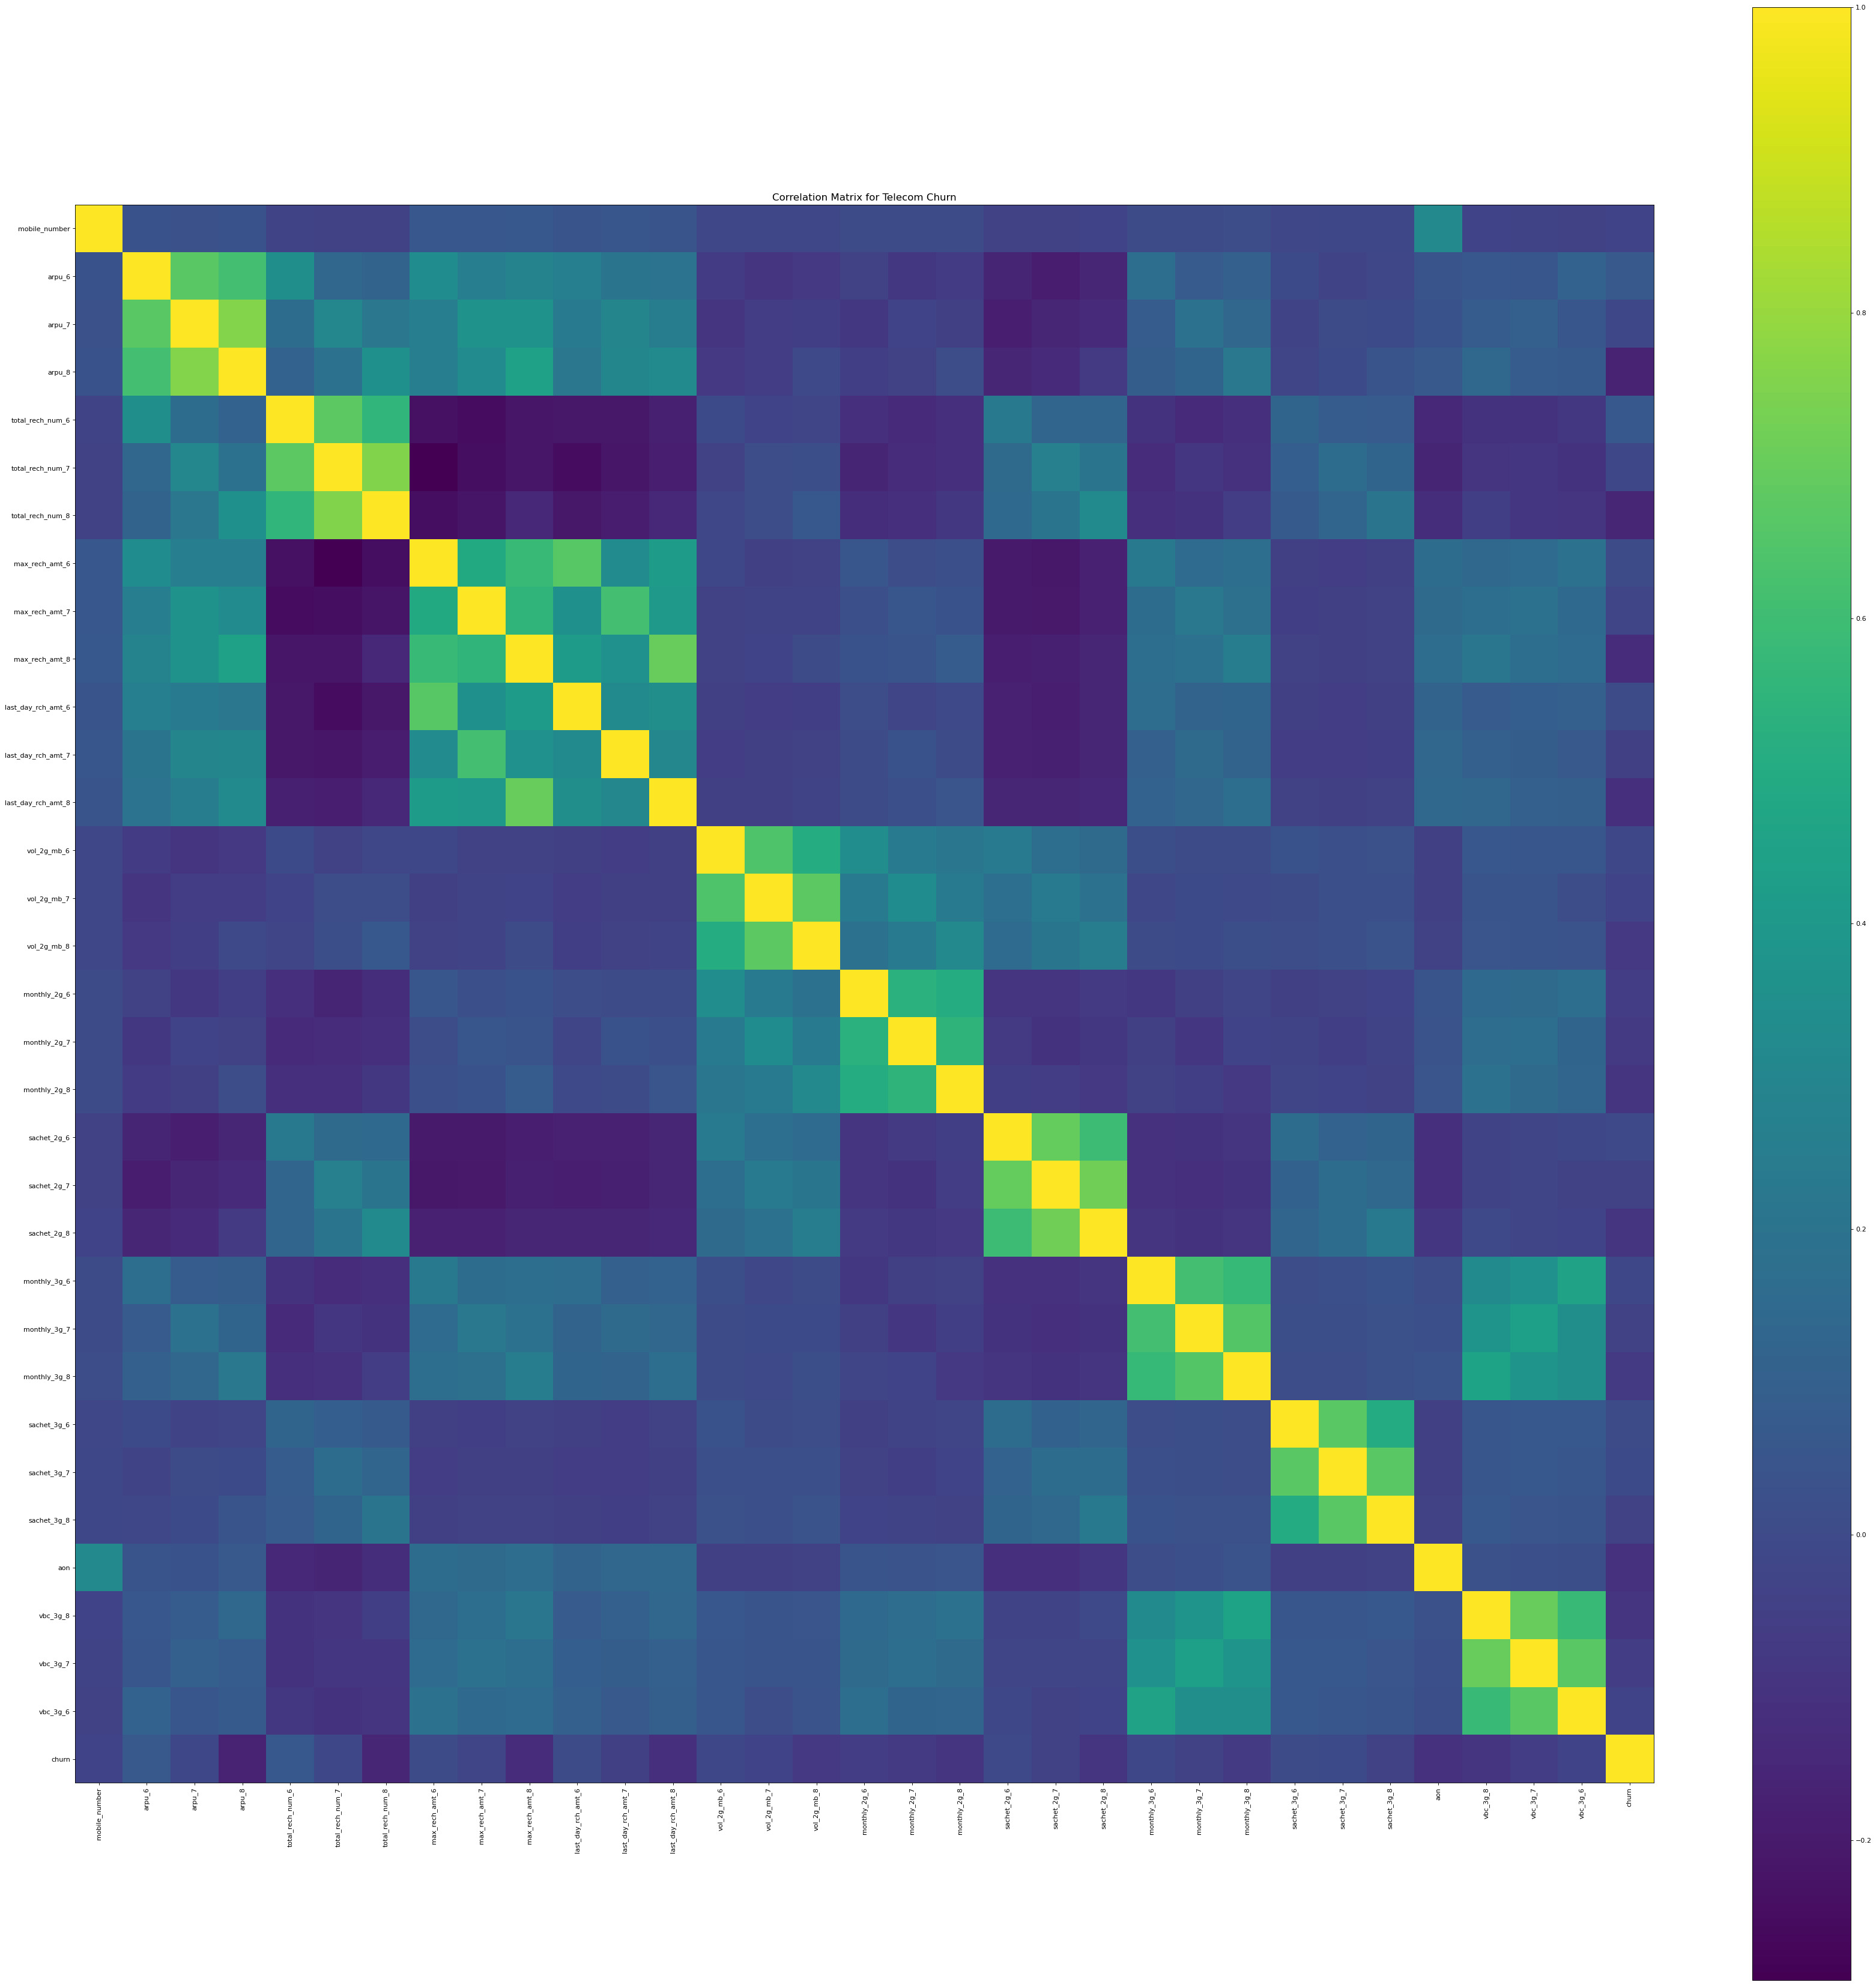

In [31]:
#Heat map plot of high value customer dataset
CorrelationMatrix(data_high_val_cust, 53)


### Scatter and Density Plots

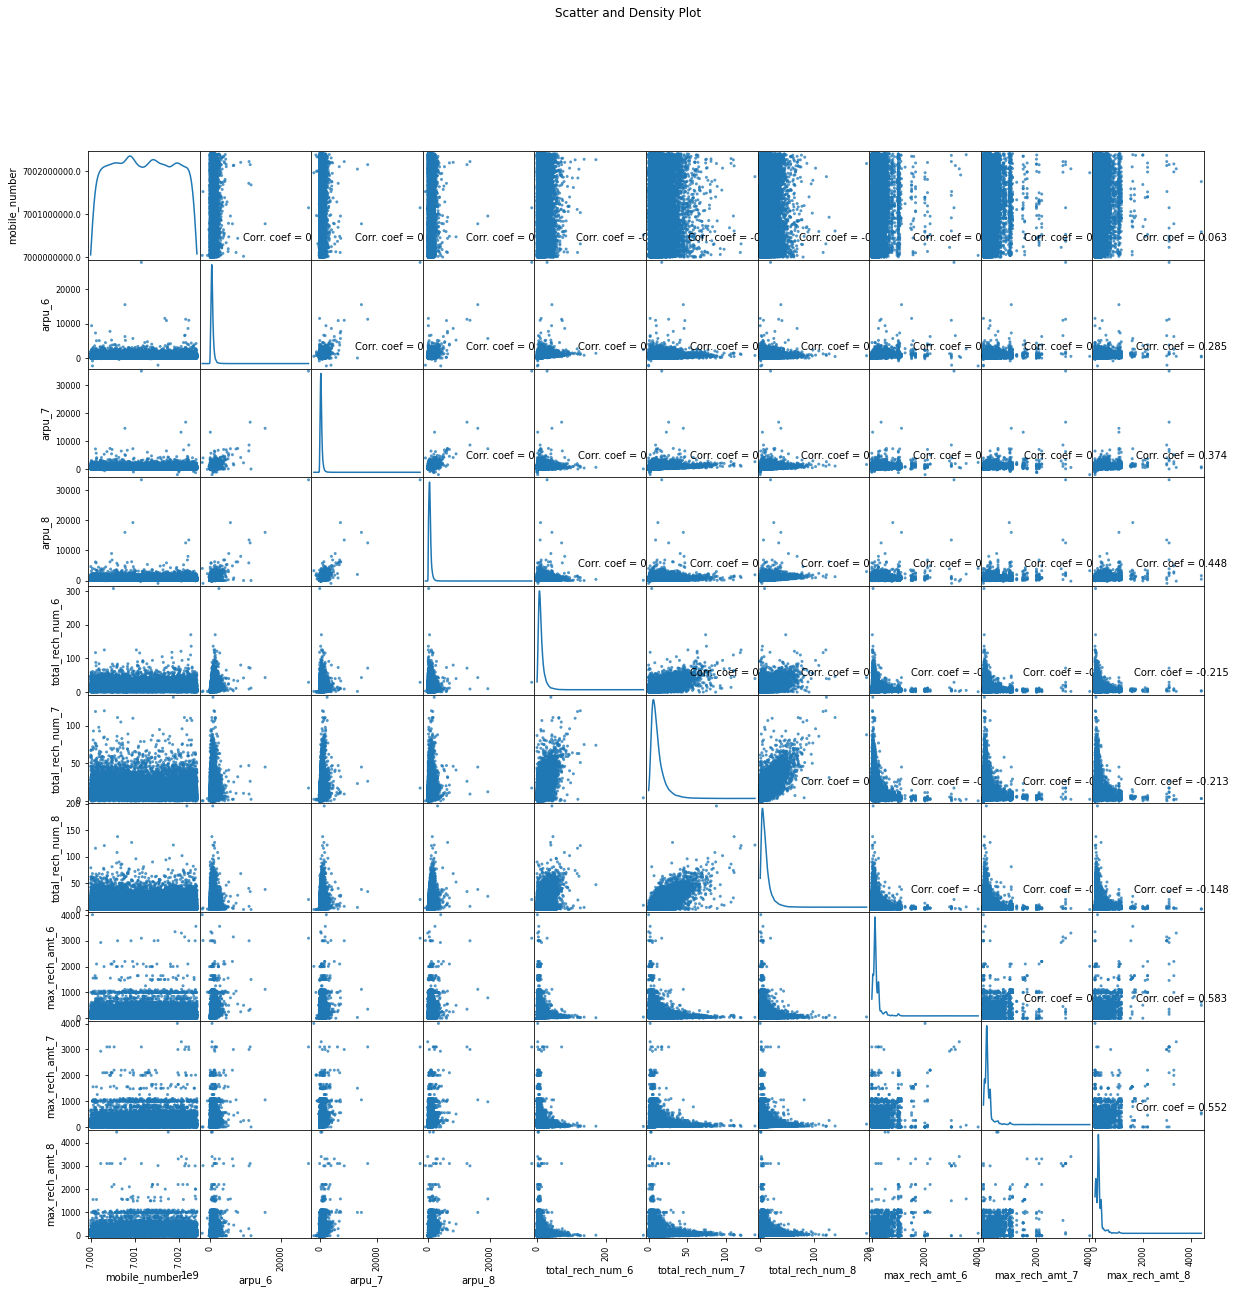

In [32]:
#Pair plot matrix of high value customer dataset
ScatterMatrix(data_high_val_cust, 20, 10)


### Reduce the No of Columns by Creating New Meaningful Features
- Create Columns with Average of 6th & 7th Month Since it's a "Good" Phase and Keep the 8th month untouched as it's "Action" Phase, for now to see if it can give any additional insight

In [33]:
col_list = data_high_val_cust.filter(regex='_6|_7').columns.str[:-2]
col_list.unique()

print (data_high_val_cust.shape)

for idx, col in enumerate(col_list.unique()):
    print(col)
    avg_col_name = "avg_"+col+"_av67"
    col_6 = col+"_6"
    col_7 = col+"_7"
    data_high_val_cust[avg_col_name] = (data_high_val_cust[col_6]  + data_high_val_cust[col_7])/ 2

(30001, 87)
arpu
onnet_mou
offnet_mou
roam_ic_mou
roam_og_mou
loc_og_t2c_mou
loc_og_mou
std_og_t2f_mou
std_og_mou
isd_og_mou
spl_og_mou
og_others
loc_ic_mou
std_ic_t2t_mou
std_ic_t2f_mou
std_ic_mou
spl_ic_mou
isd_ic_mou
ic_others
total_rech_num
max_rech_amt
last_day_rch_amt
vol_2g_mb
monthly_2g
sachet_2g
monthly_3g
sachet_3g
vbc_3g


In [35]:
#Printing number of columns before and after dropping columns
print (data_high_val_cust.shape)

col_list = data_high_val_cust.filter(regex='_6|_7').columns

data_high_val_cust.drop(col_list, axis=1, inplace=True)
data_high_val_cust.shape

(30001, 59)


(30001, 59)

In [37]:
data_high_val_cust.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,aon,vbc_3g_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5.44,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,5.75,0,0,1,0,968,30.40,1,206.1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,802,57.74,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060
8,7001524846,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,315,21.03,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405
21,7002124215,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,720,0.00,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000
23,7000887461,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,604,40.45,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930


In [38]:
#Conevrt aon in months
data_high_val_cust['aon_mon'] = data_high_val_cust['aon']/30
data_high_val_cust.drop('aon', axis=1, inplace=True)
data_high_val_cust['aon_mon'].head()

0     32.266667
7     26.733333
8     10.500000
21    24.000000
23    20.133333
Name: aon_mon, dtype: float64

Text(0.5, 1.0, 'Churn Distribution')

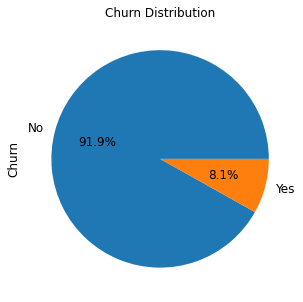

In [39]:
#Churn Distribution
ax = (data_high_val_cust['churn'].value_counts()*100.0 /len(data_high_val_cust)).plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)

In our data, 91% of the customers do not churn. Clearly the data is skewed as we would expect a large majority of the customers to not churn. This is important to keep in mind for our modelling as skeweness could lead to a lot of false negatives. We will see in the modelling section on how to avoid skewness in the data.

Histogram/Bar graph of sampled columns:


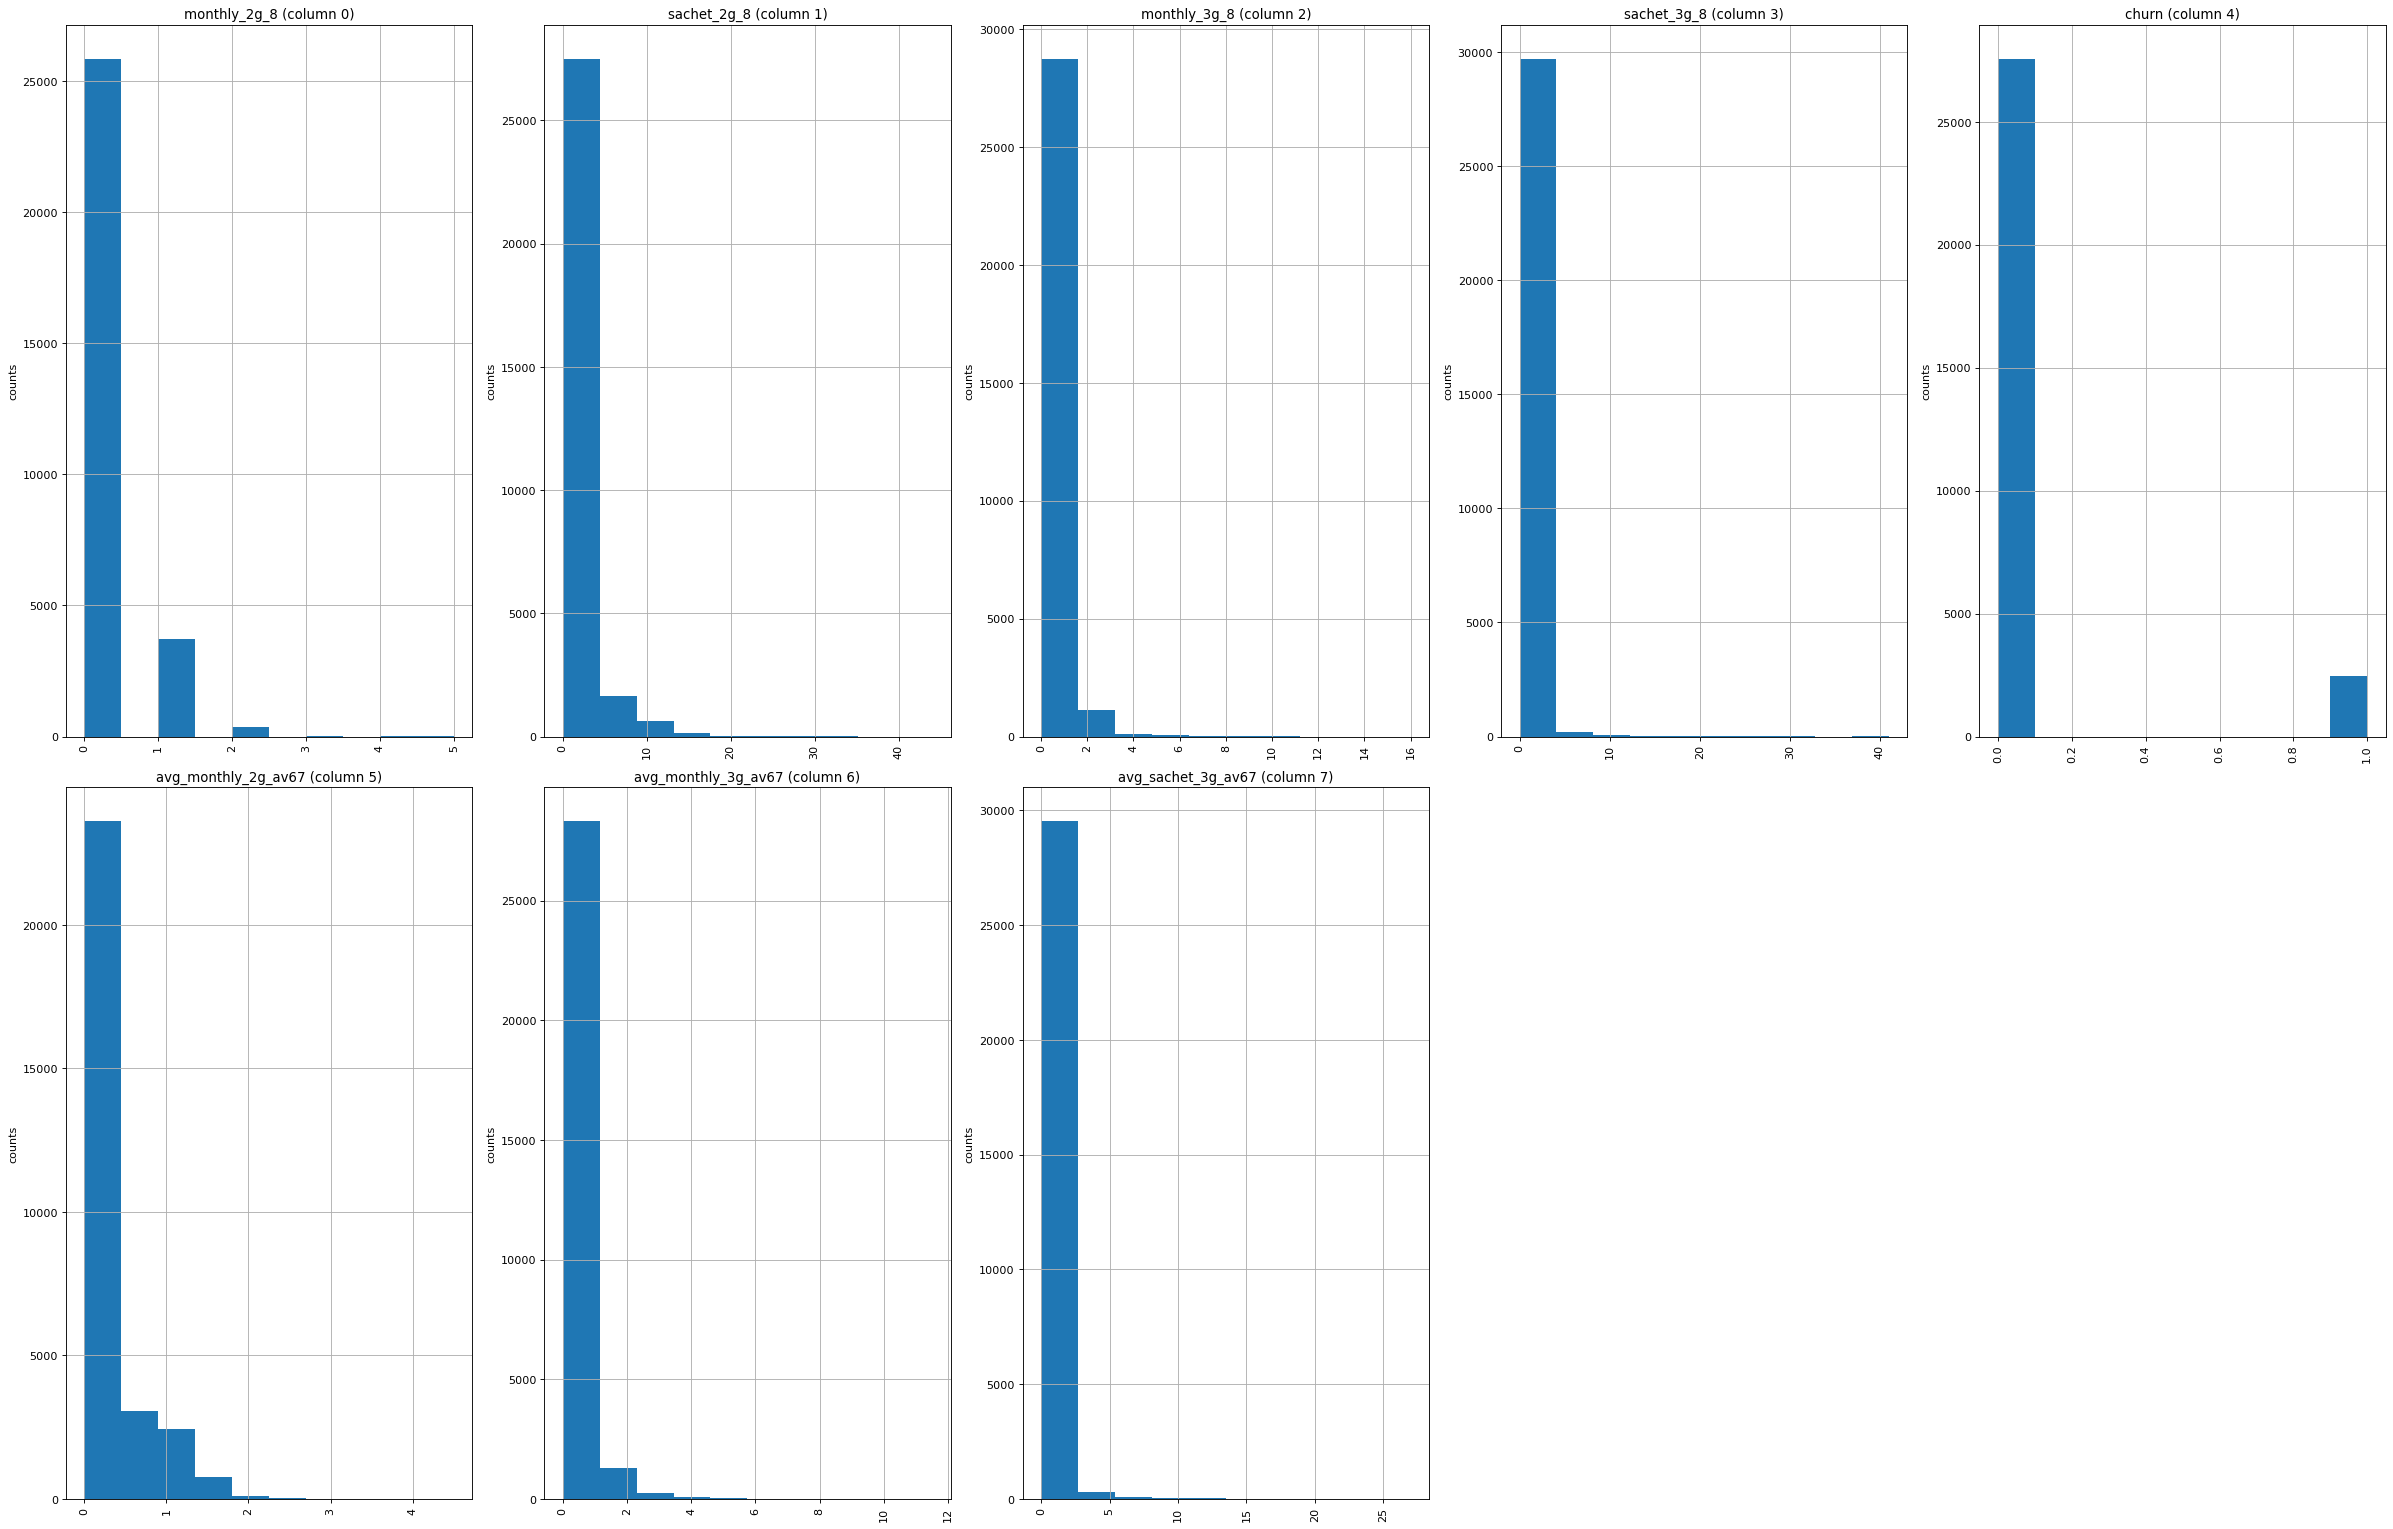

In [40]:
#dist plot of high value cutomer
ColumnDistribution(data_high_val_cust, 10, 5)

### Checking Correlation Matrix


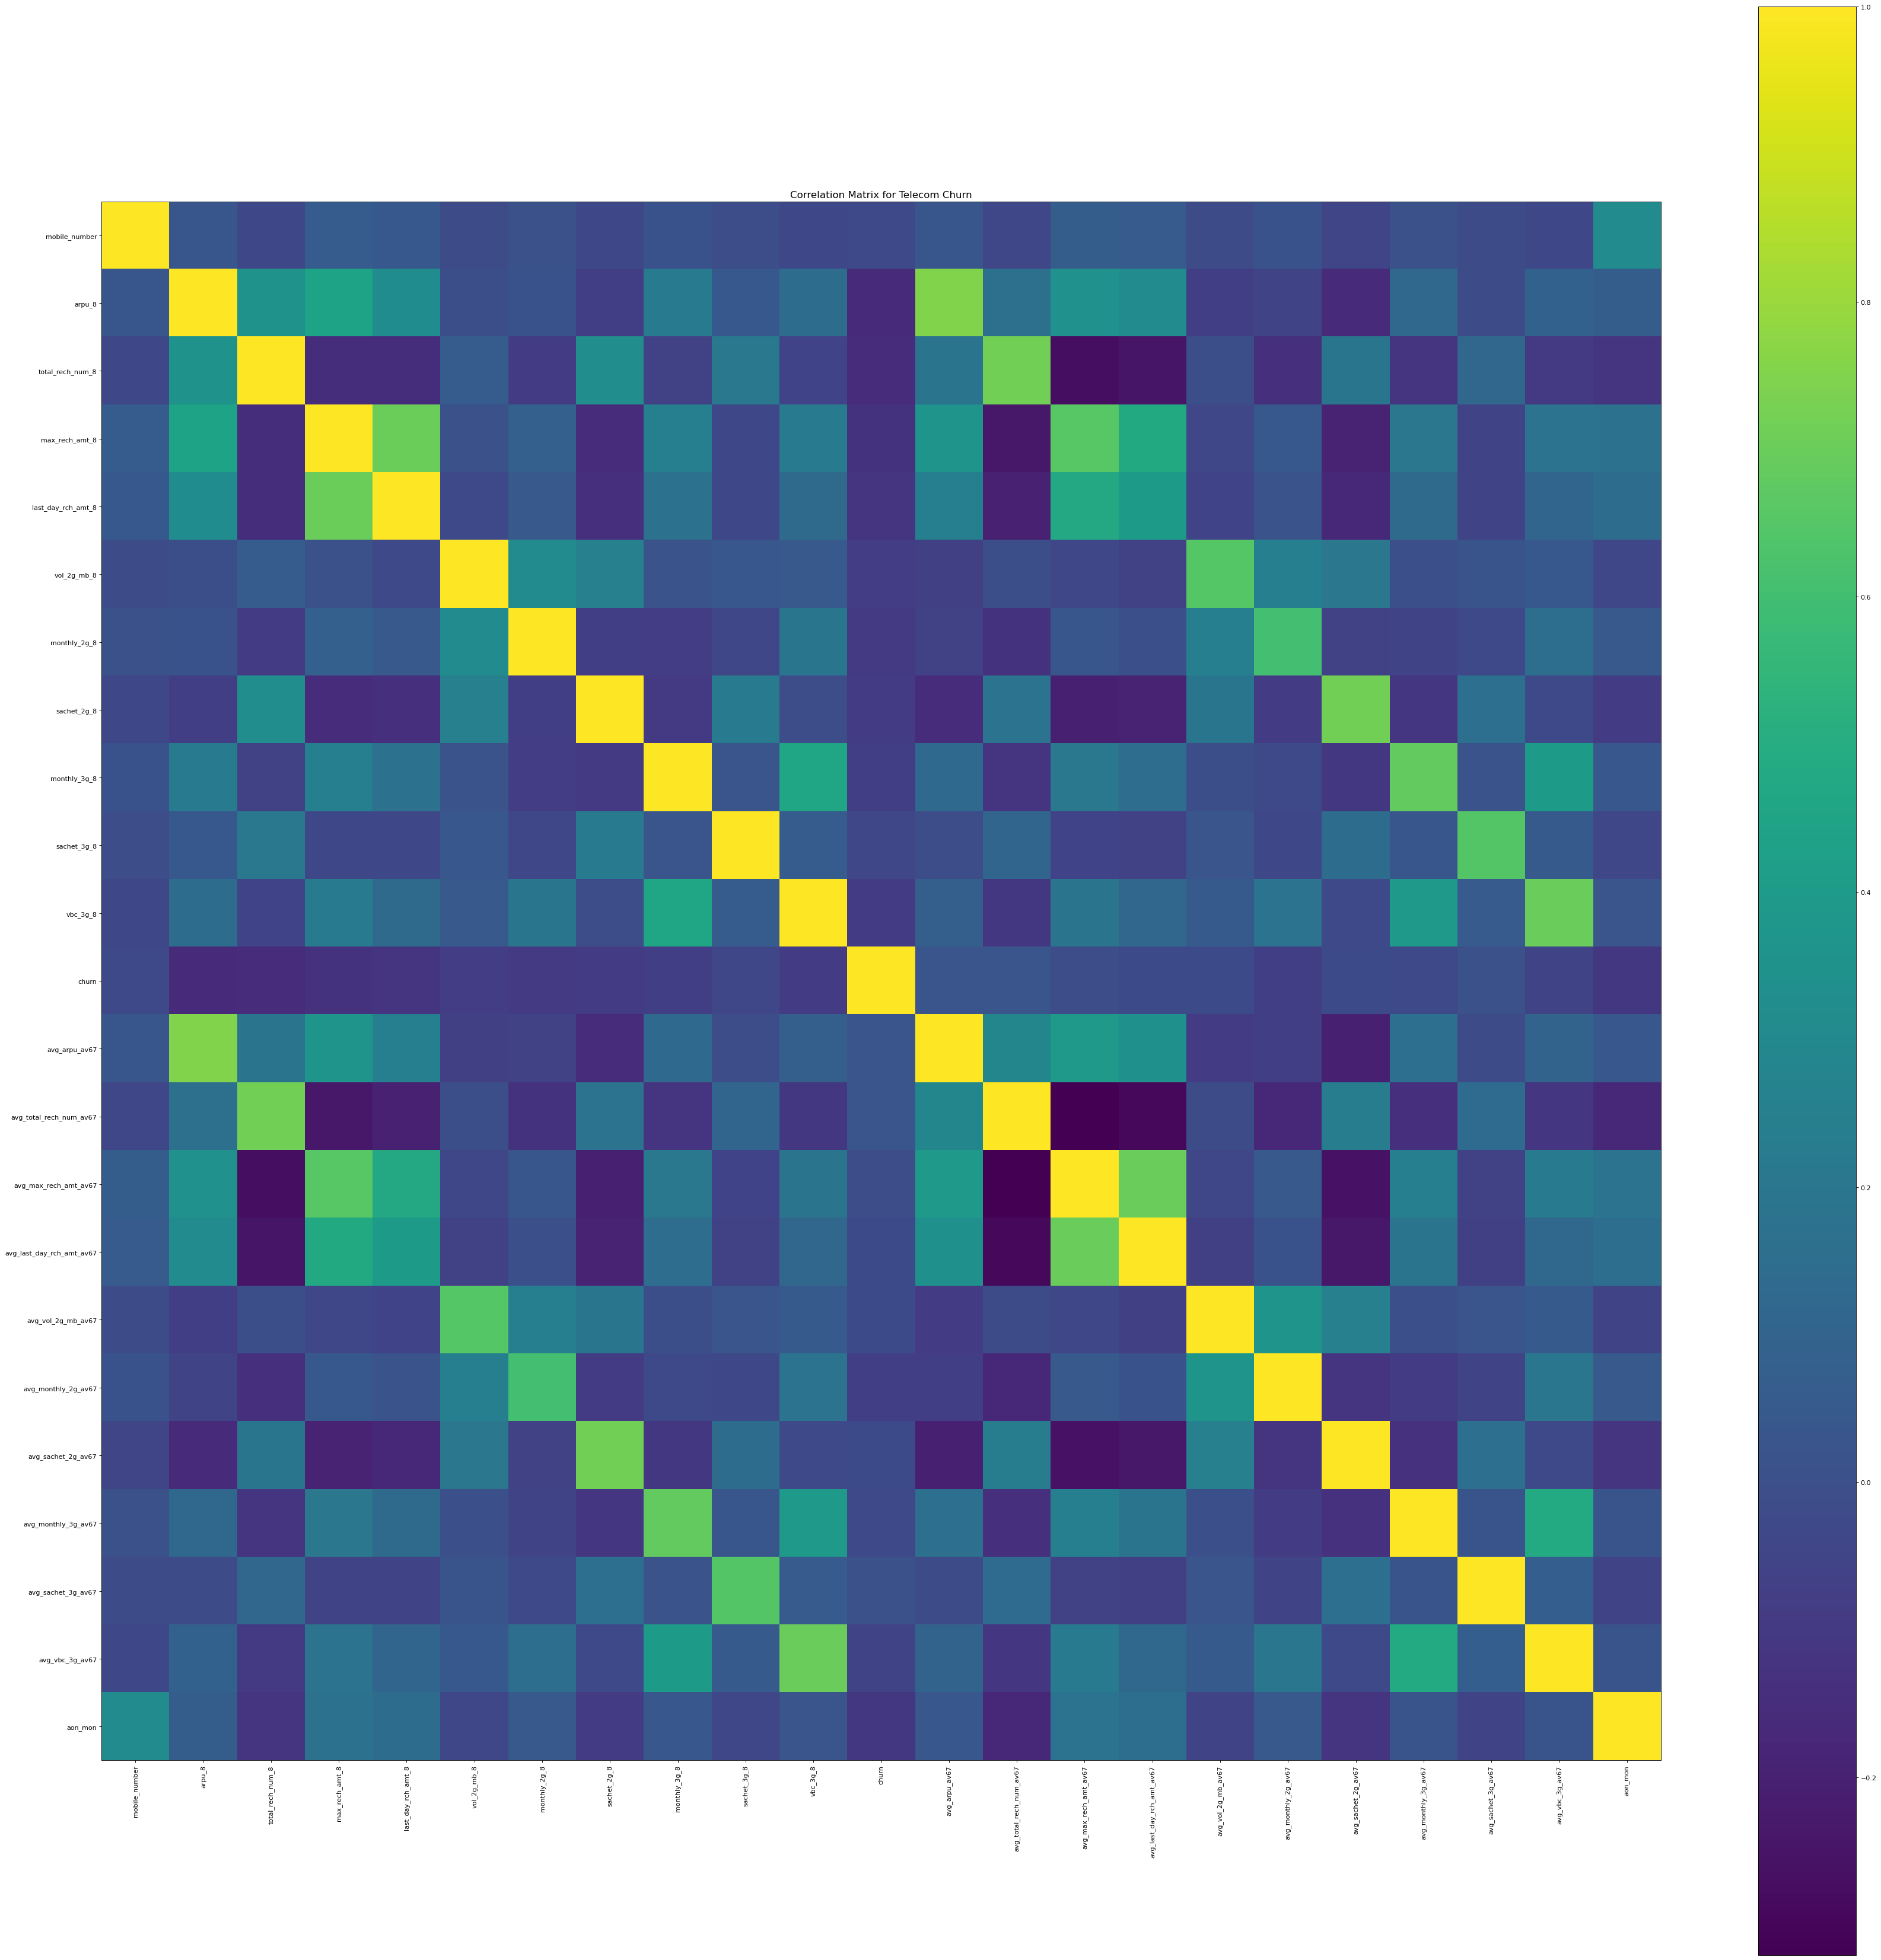

In [41]:
CorrelationMatrix(data_high_val_cust, 53)

### Scatter and Density Plot


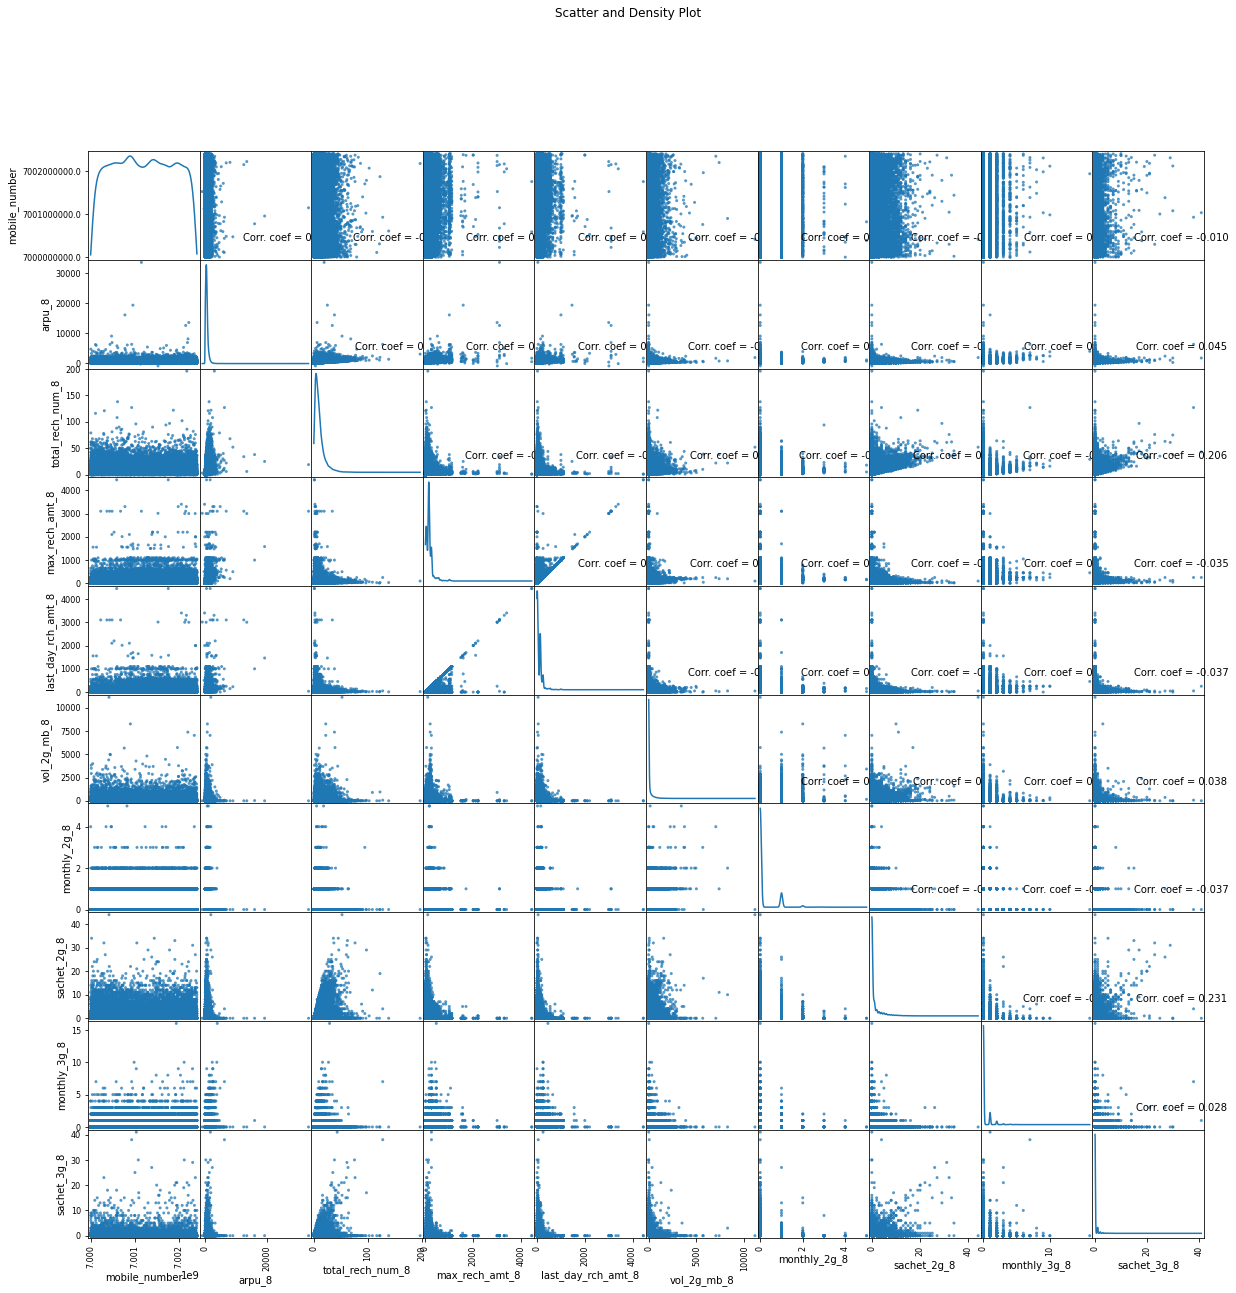

In [42]:
ScatterMatrix(data_high_val_cust, 20, 10)

Text(0.5, 1.0, 'Customers by tenure')

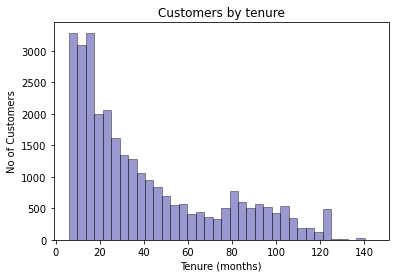

In [43]:
ax = sns.distplot(data_high_val_cust['aon_mon'], hist=True, kde=False, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Customers by tenure')

In [44]:
# Binning of months 
tn_range = [0, 6, 12, 24, 60, 61]
tn_label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data_high_val_cust['tenure_range'] = pd.cut(data_high_val_cust['aon_mon'], tn_range, labels=tn_label)
data_high_val_cust['tenure_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: tenure_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

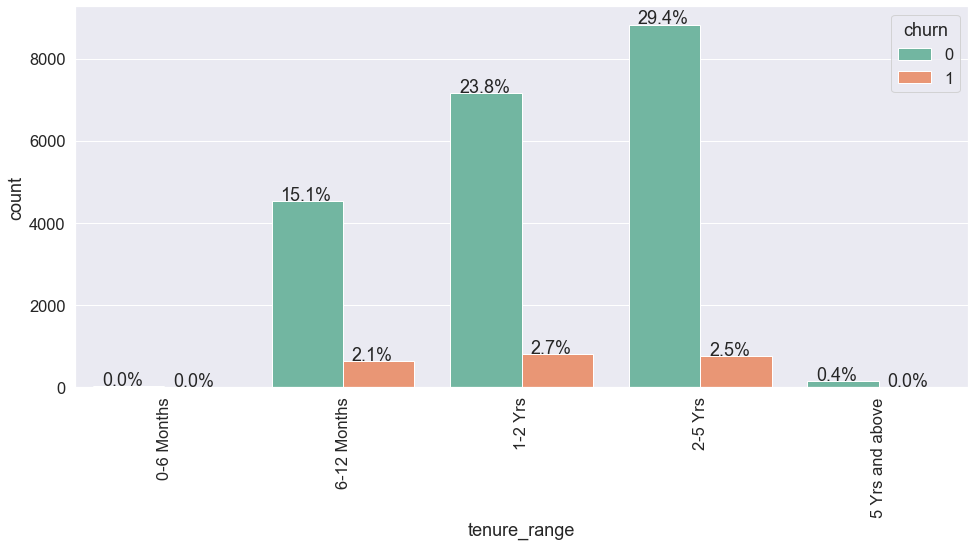

In [45]:
sns.set()
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})

temp = pd.Series(data = 'tenure_range')
fig, ax = plt.subplots()
width = len(data_high_val_cust['tenure_range'].unique()) + 6 + 4*len(temp.unique())
fig.set_size_inches(width , 7)

total = float(len(data_high_val_cust.index))
ax = sns.countplot(x="tenure_range", data=data_high_val_cust, palette="Set2", hue = "churn");
for p in ax.patches:
                ax.annotate('{:1.1f}%'.format((p.get_height()*100)/float(len(data_high_val_cust))), (p.get_x()+0.05, p.get_height()+20))
plt.xticks(rotation=90)
plt.show()

Correlation of "Churn" with other variables:


<AxesSubplot:>

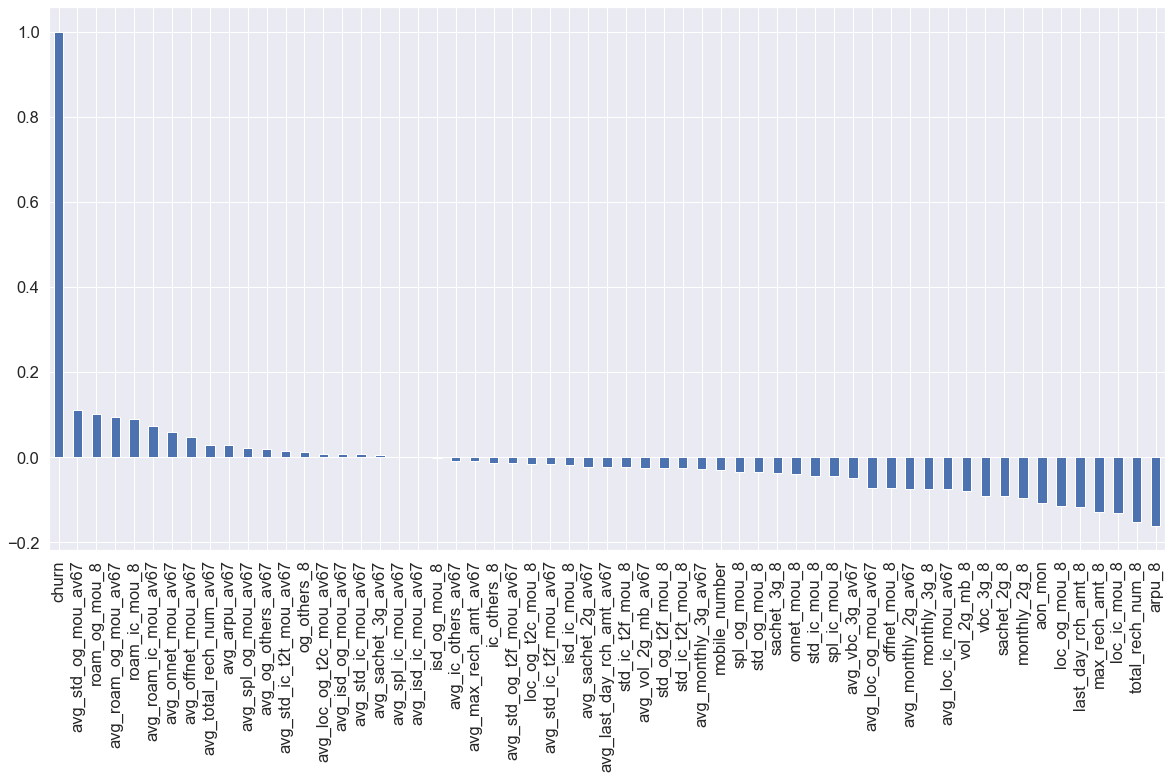

In [46]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(20,10))
data_high_val_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')

- Avg STD Outgoing Calls for Month 6 & 7, Outgoing calls in Roaming seems to be positively correlated with Churn while Avg Revenue, No Of Recharge for 8th Month seems negatively correlated.
- Lets look at the relation between total recharge in 8th Month Vs Average Revenue in 8th Month

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='total_rech_num_8', ylabel='arpu_8'>

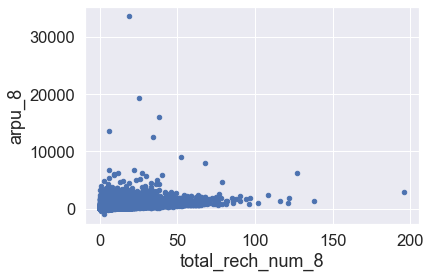

In [47]:
#Scatter plot
data_high_val_cust[['total_rech_num_8', 'arpu_8']].plot.scatter(x = 'total_rech_num_8',y='arpu_8')

###### Lets look at the relation between Tenure And Revenue

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='aon_mon', ylabel='avg_arpu_av67'>

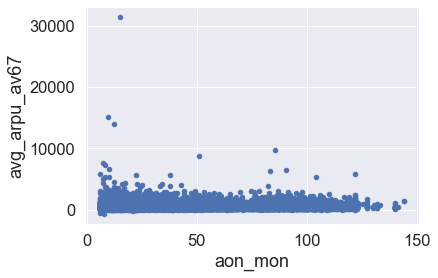

In [48]:
data_high_val_cust[['aon_mon', 'avg_arpu_av67']].plot.scatter(x = 'aon_mon',y='avg_arpu_av67')

- Finally, let's take a look at out predictor variable (Churn) and understand its interaction with other important variables as was found out in the correlation plot.


### Churn vs Tenure

<AxesSubplot:xlabel='churn', ylabel='aon_mon'>

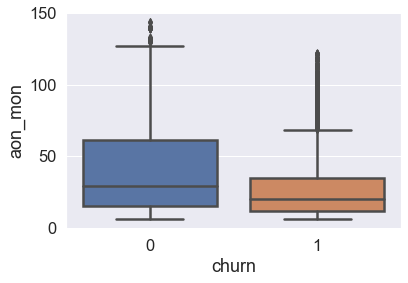

In [49]:
sns.boxplot(x = data_high_val_cust.churn, y = data_high_val_cust.aon_mon)

- As we can see form the below plot, the customers who do not churn, they tend to stay for a longer tenure with the telecom company.



### Churn vs Volume Based Cost

Text(0.5, 1.0, 'Distribution of Volume based cost by churn')

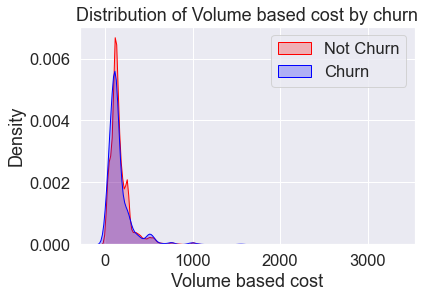

In [50]:
ax = sns.kdeplot(data_high_val_cust.avg_max_rech_amt_av67[(data_high_val_cust["churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(data_high_val_cust.avg_max_rech_amt_av67[(data_high_val_cust["churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Volume based cost by churn')

#### Churn vs Max Recharge Amount

Text(0.5, 1.0, 'Distribution of Max Recharge Amount by churn')

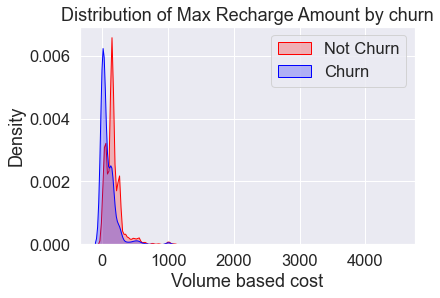

In [51]:
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_8[(data_high_val_cust["churn"] == 0)],color="Red", shade = True)
ax = sns.kdeplot(data_high_val_cust.max_rech_amt_8[(data_high_val_cust["churn"] == 1)],ax =ax, color="Blue", shade= True)
ax.legend(["Not Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of Max Recharge Amount by churn')

- People Who Recharge with less Amount are more likely to Churn
- There is no visible difference in Volume Based Cost and Churn

In [52]:
data_high_val_cust.head()

,mobile_number,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon,tenure_range
0,7000842753,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5.44,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,5.75,0,0,1,0,30.40,1,206.1005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.5,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600,32.266667,2-5 Yrs
7,7000701601,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060,26.733333,2-5 Yrs
8,7001524846,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405,10.500000,6-12 Months
21,7002124215,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000,24.000000,1-2 Yrs
23,7000887461,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930,20.133333,1-2 Yrs


In [53]:
#Lets Create New DF for Model Building

new_data = data_high_val_cust[:].copy()

#Dropping tenure_range since we have AON MONTH already and columns are highly coorelated
new_data.drop('tenure_range', axis=1, inplace=True)
new_data.drop('mobile_number', axis=1, inplace=True)

#Since All The Values are realted to Price/ Cost/ Amount, Filling NaN with 0

new_data.fillna(0, inplace=True)

new_data.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2c_mou_8,loc_og_mou_8,std_og_t2f_mou_8,std_og_mou_8,isd_og_mou_8,spl_og_mou_8,og_others_8,loc_ic_mou_8,std_ic_t2t_mou_8,std_ic_t2f_mou_8,std_ic_mou_8,spl_ic_mou_8,isd_ic_mou_8,ic_others_8,total_rech_num_8,max_rech_amt_8,last_day_rch_amt_8,vol_2g_mb_8,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,vbc_3g_8,churn,avg_arpu_av67,avg_onnet_mou_av67,avg_offnet_mou_av67,avg_roam_ic_mou_av67,avg_roam_og_mou_av67,avg_loc_og_t2c_mou_av67,avg_loc_og_mou_av67,avg_std_og_t2f_mou_av67,avg_std_og_mou_av67,avg_isd_og_mou_av67,avg_spl_og_mou_av67,avg_og_others_av67,avg_loc_ic_mou_av67,avg_std_ic_t2t_mou_av67,avg_std_ic_t2f_mou_av67,avg_std_ic_mou_av67,avg_spl_ic_mou_av67,avg_isd_ic_mou_av67,avg_ic_others_av67,avg_total_rech_num_av67,avg_max_rech_amt_av67,avg_last_day_rch_amt_av67,avg_vol_2g_mb_av67,avg_monthly_2g_av67,avg_sachet_2g_av67,avg_monthly_3g_av67,avg_sachet_3g_av67,avg_vbc_3g_av67,aon_mon
0,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,5.44,0.00,0.00,0.00,0.0,0.00,0.00,2,252,252,5.75,0,0,1,0,30.40,1,206.1005,0.00,0.000,0.00,0.000,0.0,0.000,0.00,0.000,0.000,0.00,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,3.5,252.0,252.0,15.725,0.0,0.0,1.0,0.0,50.600,32.266667
7,3171.480,52.29,325.91,31.64,38.06,0.00,255.79,16.68,77.84,10.01,6.50,0.0,188.04,30.39,22.21,193.94,0.0,31.59,15.14,7,1580,779,0.00,0,0,0,0,57.74,1,1209.5150,56.26,510.295,24.86,18.165,0.0,478.035,13.37,68.000,0.090,2.25,0.0,391.555,24.360,43.215,176.810,0.105,8.295,15.465,5.0,1185.0,0.0,0.000,0.0,0.0,0.0,0.0,19.060,26.733333
8,137.362,35.08,136.48,0.00,0.00,7.15,63.04,0.00,98.28,0.00,10.23,0.0,15.79,0.10,0.00,0.75,0.0,0.00,0.00,14,30,10,0.03,0,3,0,0,21.03,0,435.4720,382.36,87.645,0.00,0.000,0.0,333.135,0.00,136.870,0.000,0.00,0.0,52.630,0.290,0.000,13.545,0.000,0.000,0.000,20.0,122.0,25.0,178.000,0.5,0.5,0.0,0.0,516.405,10.500000
21,637.760,85.14,983.39,0.00,0.00,0.00,129.74,0.00,938.79,0.00,0.00,0.0,159.11,0.18,0.00,101.93,0.0,0.00,0.00,27,50,50,0.00,0,0,0,0,0.00,0,556.1030,117.26,827.305,0.00,0.000,0.0,95.565,0.00,848.990,0.000,0.00,0.0,106.505,10.020,0.000,62.985,0.000,0.000,0.000,24.0,50.0,25.0,0.000,0.0,0.0,0.0,0.0,0.000,24.000000
23,366.966,33.58,205.89,0.00,0.00,17.71,182.14,0.00,39.61,0.00,17.71,0.0,224.21,13.38,0.00,57.29,0.0,3.74,13.06,4,179,0,0.01,0,0,1,1,40.45,0,134.1235,49.81,87.385,0.00,0.000,0.0,132.795,0.00,4.355,0.005,0.05,0.0,145.520,0.255,0.000,8.915,0.000,14.115,2.675,4.0,89.5,89.5,0.240,0.0,0.0,1.0,0.0,25.930,20.133333


In [54]:
X = new_data.drop(['churn'], axis=1)
y = new_data['churn']

new_data.drop('churn', axis=1, inplace=True)

In [55]:
scaler = preprocessing.StandardScaler().fit(X)
X = scaler.transform(X)


In [56]:
# Split in train & Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)


In [57]:
print("X_train Shape : ", X_train.shape)
print("X_test Shape : ", X_test.shape)

y_train_imb = (y_train != 0).sum()/(y_train == 0).sum()
y_test_imb = (y_test != 0).sum()/(y_test == 0).sum()
print("Imbalance in Train Data : ", y_train_imb)
print("Imbalance in Test Data : ", y_test_imb)

X_train Shape :  (21000, 57)
X_test Shape :  (9001, 57)
Imbalance in Train Data :  0.08875985068436333
Imbalance in Test Data :  0.08812862669245648


In [58]:
# Balancing DataSet
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)

In [60]:
print("y_tr Shape", y_tr.shape)

imb = (y_tr != 0).sum()/(y_tr == 0).sum()
print("Imbalance in Train Data : ",imb)

y_tr Shape (38576,)
Imbalance in Train Data :  1.0


## Model Building












### Support Vecor Machine (SVM)



In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)

lr = LogisticRegression()

lr.svm = SVC(kernel='linear') 
lr.svm.fit(X_train,y_train)
preds = lr.svm.predict(X_test)
metrics.accuracy_score(y_test, preds)

0.9170138310281619

### RFE

In [62]:
# Feature reduction using RFE
lr = LogisticRegression()
# running RFE with 15 variables as output
rfe = RFE(lr, n_features_to_select=15)   
rfe = rfe.fit(X_tr, y_tr)

In [63]:
rfe_features = list(new_data.columns[rfe.support_])
print("Features identified by RFE ", rfe_features)

Features identified by RFE  ['loc_og_mou_8', 'og_others_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8', 'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8', 'vol_2g_mb_8', 'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'avg_arpu_av67', 'avg_loc_ic_mou_av67', 'avg_monthly_2g_av67']


In [64]:
X_rfe = pd.DataFrame(data=X_tr).iloc[:, rfe.support_]
y_rfe = y_tr

### Logistic Regression

In [65]:
lr = LogisticRegression(random_state=1)
lr.fit(X_rfe, y_rfe)

LogisticRegression(random_state=1)

In [66]:
X_test_rfe = pd.DataFrame(data=X_test).iloc[:, rfe.support_]

y_pred = lr.predict(X_test_rfe)

from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

<function confusion_matrix at 0x0000017E3D28DAF0>


##### Sensitivity and Specificity

In [67]:
# Substituting the value of true positive
TP = conf_matrix[1,1]
# Substituting the value of true negatives
TN = conf_matrix[0,0]
# Substituting the value of false positives
FP = conf_matrix[0,1] 
# Substituting the value of false negatives
FN = conf_matrix[1,0]

# Calculating the sensitivity
sens_log_pca=TP/(TP+FN)

# Calculating the specificity
spec_log_pca=TN/(TN+FP)

print("Sensitivity:" ,sens_log_pca)
print("Specificity:" ,spec_log_pca)

Sensitivity: 0.8373493975903614
Specificity: 0.8033799745593313


In [68]:
print('Accuracy of Logistic Regression Model on test set is ',lr.score(X_test_rfe, y_test))

Accuracy of Logistic Regression Model on test set is  0.8061989668388602


In [69]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.80      0.88      5503
           1       0.28      0.84      0.42       498

    accuracy                           0.81      6001
   macro avg       0.63      0.82      0.65      6001
weighted avg       0.92      0.81      0.85      6001



In [70]:
# To get the weights of all the variables
weights = pd.Series(lr.coef_[0],
                 index=rfe_features)
weights.sort_values(ascending = False)

avg_loc_ic_mou_av67    0.699985
avg_arpu_av67          0.593082
avg_monthly_2g_av67   -0.227315
vol_2g_mb_8           -0.288961
std_ic_t2f_mou_8      -0.365753
spl_ic_mou_8          -0.409436
std_ic_mou_8          -0.450881
monthly_3g_8          -0.505854
last_day_rch_amt_8    -0.559340
sachet_2g_8           -0.571248
monthly_2g_8          -0.593602
total_rech_num_8      -0.665938
loc_og_mou_8          -0.968986
og_others_8           -2.740070
loc_ic_mou_8          -2.776696
dtype: float64

LR Summary

- Model Accuracy is 80%
- There is High False Positives in the Model

### PCA

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#Smote
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(38576, 57)
(38576,)


### Applying PCA

In [72]:
#Improting the PCA module
pca = PCA(random_state=100)

#Doing the PCA on the train data
pca.fit(X_tr)

PCA(random_state=100)

In [73]:
X_tr_pca = pca.fit_transform(X_tr)
print(X_tr_pca.shape)
X_test_pca = pca.transform(X_test)
print(X_test_pca.shape)

(38576, 57)
(9001, 57)


### Applying Logistic Regresison

In [74]:
# Instance of logistic regression
lr_pca = LogisticRegression(C=1e9)
lr_pca.fit(X_tr_pca, y_tr)

# Predicted probabilities
y_pred = lr_pca.predict(X_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [75]:
# Printing confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[6734 1538]
 [ 130  599]]


#### Senstivity and Specificity

In [76]:
# Substituting the value of true positive
TP = conf_mat[1,1]
# Substituting the value of true negatives
TN = conf_mat[0,0]
# Substituting the value of false positives
FP = conf_mat[0,1] 
# Substituting the value of false negatives
FN = conf_mat[1,0]

# Calculating the sensitivity
sens_log_pca=TP/(TP+FN)

# Calculating the specificity
spec_log_pca=TN/(TN+FP)

print("Sensitivity:" ,sens_log_pca)
print("Specificity:" ,spec_log_pca)

Sensitivity: 0.821673525377229
Specificity: 0.8140715667311412


In [77]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred))

Logistic Regression accuracy with PCA:  0.8146872569714476


In [78]:
col = list(new_data.columns)
data_pca = pd.DataFrame({'PCA1':pca.components_[0],'PCA2':pca.components_[1], 'PCA3':pca.components_[2],'Feature':col})
data_pca.head(10)

,PCA1,PCA2,PCA3,Feature
0,0.268905,-0.079609,0.178006,arpu_8
1,0.170014,-0.187318,-0.004637,onnet_mou_8
2,0.225806,-0.152288,0.067717,offnet_mou_8
3,0.290309,0.315896,-0.189975,roam_ic_mou_8
4,0.257265,0.207044,-0.168585,roam_og_mou_8
5,0.038451,-0.058801,0.001786,loc_og_t2c_mou_8
6,0.124820,-0.083040,0.195742,loc_og_mou_8
7,0.033745,0.007407,0.075664,std_og_t2f_mou_8
8,0.185221,-0.244825,-0.041071,std_og_mou_8
9,0.030276,-0.002339,0.044925,isd_og_mou_8


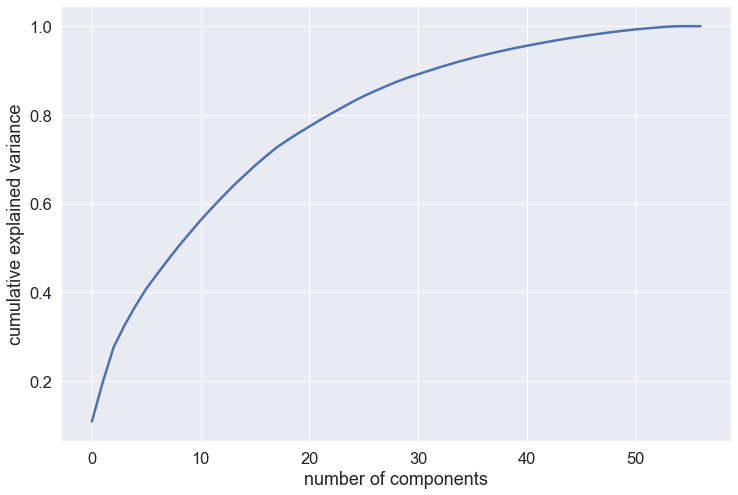

In [79]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [80]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 10.87,  19.74,  27.63,  32.55,  36.88,  40.81,  44.12,  47.34,
        50.46,  53.39,  56.25,  58.93,  61.51,  64.02,  66.32,  68.58,
        70.67,  72.68,  74.34,  75.9 ,  77.39,  78.86,  80.28,  81.64,
        82.99,  84.24,  85.35,  86.42,  87.45,  88.36,  89.17,  89.97,
        90.74,  91.49,  92.19,  92.85,  93.46,  94.05,  94.6 ,  95.13,
        95.6 ,  96.07,  96.52,  96.95,  97.36,  97.73,  98.09,  98.43,
        98.75,  99.03,  99.3 ,  99.54,  99.74,  99.93, 100.04, 100.04,
       100.04])

Applying LR with 32 columns with 90% variance



In [81]:
pca_32 = PCA(n_components=32)

df_tr_pca_32 = pca_32.fit_transform(X_tr)
print(df_tr_pca_32.shape)

df_test_pca_32 = pca_32.transform(X_test)
print(df_test_pca_32.shape)

(38576, 32)
(9001, 32)


In [82]:
# Let's run the model using the selected variables
lr_pca1 = LogisticRegression(C=1e9)
lr_pca1.fit(df_tr_pca_32, y_tr)

# Predicted probabilities
y_pred32 = lr_pca1.predict(df_test_pca_32)

# Converting y_pred to a dataframe which is an array
df_y_pred = pd.DataFrame(y_pred32)

In [83]:
conf_matrices = confusion_matrix(y_test,y_pred32)

#### Sensitivity and Specificity

In [84]:
# Substituting the value of true positive
TP = conf_matrices[1,1]
# Substituting the value of true negatives
TN = conf_matrices[0,0]
# Substituting the value of false positives
FP = conf_matrices[0,1] 
# Substituting the value of false negatives
FN = conf_matrices[1,0]

# Calculating the sensitivity
sens_log_pca=TP/(TP+FN)

# Calculating the specificity
spec_log_pca=TN/(TN+FP)

print("Sensitivity:" ,sens_log_pca)
print("Specificity:" ,spec_log_pca)

Sensitivity: 0.8093278463648834
Specificity: 0.8102030947775629


In [85]:
print("Logistic Regression accuracy with PCA: ",accuracy_score(y_test,y_pred32))

Logistic Regression accuracy with PCA:  0.8101322075324964


Summary :

- Model has 81% Accuracy
- 32 Features can obtain optimal accuracy with 90% Variance
- Main Features: arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8

#### Decision Tress

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)

#Smote
sm = SMOTE()
X_tr,y_tr = sm.fit_sample(X_train,y_train)
print(X_tr.shape)
print(y_tr.shape)

(38576, 57)
(38576,)


#### Feature reduction using LASSO

In [87]:
lsvc = LinearSVC(C=0.001, penalty="l1", dual=False).fit(X_tr, y_tr)
model = SelectFromModel(lsvc, prefit=True)
X_lasso = model.transform(X_tr)
pos = model.get_support(indices=True)
 
### Feature reduction using RFE
print(X_lasso.shape)
print(pos)

(38576, 30)
[ 0  2  3  4  6  7  8 10 12 15 16 19 20 21 22 23 24 25 27 28 31 33 36 40
 41 47 48 50 51 56]


In [89]:
#feature vector for decision tree
lasso_features = list(telecom_data.columns[pos])
print("Features for LASSO model buidling: ", lasso_features)

Features for LASSO model buidling:  ['mobile_number', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'arpu_7', 'arpu_9', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_8', 'offnet_mou_9', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_ic_mou_9', 'roam_og_mou_6', 'roam_og_mou_8', 'roam_og_mou_9', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_6', 'loc_og_mou_8', 'loc_og_mou_9', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_9']


#### Decision Tree with Default Hyperparameter

In [90]:
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5)

In [91]:
# The evaluation metrics of our default model
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
X_test = pd.DataFrame(data=X_test).iloc[:, pos]
y_pred1 = dt1.predict(X_test)

# Printing classification report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8272
           1       0.35      0.78      0.48       729

    accuracy                           0.86      9001
   macro avg       0.66      0.82      0.70      9001
weighted avg       0.93      0.86      0.89      9001



In [92]:
# Printing confusion matrix and accuracy
print(confusion_matrix(y_test,y_pred1))
print('Accuracy of Decision Tree :',accuracy_score(y_test,y_pred1))

[[7203 1069]
 [ 163  566]]
Accuracy of Decision Tree : 0.8631263192978558


### Hyperparameter Tuning
#### Tuning max_depth

In [93]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(1, 40)}

# instantiate the model
dt = DecisionTreeClassifier(criterion = "gini",random_state = 100)

# fit tree on training data
tree = GridSearchCV(dt, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,verbose = 1)
tree.fit(X_lasso, y_tr)

Fitting 5 folds for each of 39 candidates, totalling 195 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy', verbose=1)

In [94]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.082999,0.006080,0.006648,0.007365,1,{'max_depth': 1},0.788362,0.789890,0.784316,0.780298,0.789242,0.786422,0.003624,39,0.786714,0.785846,0.787661,0.788147,0.786494,0.786972,0.000827
1,0.160143,0.022286,0.000996,0.001260,2,{'max_depth': 2},0.806506,0.812962,0.816591,0.816461,0.821128,0.814730,0.004861,38,0.816526,0.815852,0.814070,0.815398,0.812871,0.814943,0.001311
2,0.203728,0.004393,0.003523,0.006098,3,{'max_depth': 3},0.842794,0.859883,0.862605,0.858328,0.863772,0.857477,0.007590,37,0.861925,0.857846,0.857490,0.858300,0.856680,0.858448,0.001817
3,0.262439,0.006247,0.000000,0.000000,4,{'max_depth': 4},0.853421,0.863513,0.869605,0.859365,0.871549,0.863491,0.006644,36,0.872035,0.867211,0.866142,0.867114,0.865234,0.867547,0.002356
4,0.321799,0.007652,0.003124,0.006249,5,{'max_depth': 5},0.859124,0.872715,0.881141,0.873752,0.879844,0.873315,0.007821,35,0.884122,0.881598,0.877807,0.880853,0.876187,0.880113,0.002813


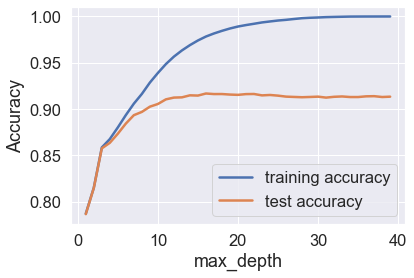

In [95]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(score["param_max_depth"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_max_depth"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

According to above plot, max_depth =10 is optimal


In [96]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", 
                               random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, 
                    cv=n_folds, 
                   scoring="accuracy", return_train_score=True,verbose = 1)
tree.fit(X_lasso, y_tr)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy', verbose=1)

In [97]:
# scores of GridSearch CV
score = tree.cv_results_
pd.DataFrame(score).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.927839,0.035232,0.000000,0.000000,5,{'min_samples_leaf': 5},0.873250,0.910564,0.923007,0.913286,0.915489,0.907119,0.017433,1,0.968697,0.965199,0.964875,0.966333,0.966625,0.966346,0.001348
1,0.773126,0.024478,0.006847,0.007247,25,{'min_samples_leaf': 25},0.869751,0.897861,0.906935,0.896824,0.908231,0.895920,0.013873,2,0.923979,0.918700,0.919964,0.918894,0.921519,0.920611,0.001959
2,0.700536,0.038642,0.000505,0.001010,45,{'min_samples_leaf': 45},0.863142,0.890732,0.898898,0.892158,0.897343,0.888455,0.013021,3,0.908944,0.906516,0.904831,0.904864,0.904572,0.905945,0.001650
3,0.699380,0.047086,0.000000,0.000000,65,{'min_samples_leaf': 65},0.865474,0.885159,0.895010,0.892288,0.896176,0.886821,0.011339,4,0.902819,0.896374,0.897346,0.899874,0.897800,0.898843,0.002293
4,0.678407,0.052499,0.001397,0.001197,85,{'min_samples_leaf': 85},0.869362,0.887492,0.887881,0.883863,0.890473,0.883814,0.007527,5,0.894653,0.894106,0.891514,0.894689,0.892680,0.893528,0.001243


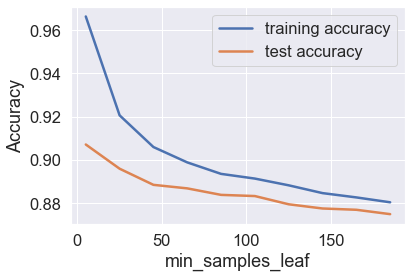

In [98]:
plt.figure()
plt.plot(score["param_min_samples_leaf"], 
         score["mean_train_score"], 
         label="training accuracy")
plt.plot(score["param_min_samples_leaf"], 
         score["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

- min_samples_leaf looks optimal

In [99]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(25, 175, 50),
    'min_samples_split': range(50, 150, 50),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier()
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, 
                          cv = n_folds, verbose = 1,return_train_score=True)

# Fit the grid search to the data
grid_search.fit(X_lasso, y_tr)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(25, 175, 50),
                         'min_samples_split': range(50, 150, 50)},
             return_train_score=True, verbose=1)

In [100]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results
# printing the optimal accuracy score and hyperparameters
print("Best Accuracy", grid_search.best_score_)

Best Accuracy 0.8964128775012623


In [101]:
print(grid_search.best_estimator_)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=25, min_samples_split=50)


In [102]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=5, 
                                  min_samples_leaf=25,
                                  min_samples_split=50)
clf_gini.fit(X_lasso, y_tr)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=25, min_samples_split=50,
                       random_state=100)

In [103]:
# accuracy score
print ('Accuracy Score for Decision Tree Final Model :',clf_gini.score(X_test,y_test))

Accuracy Score for Decision Tree Final Model : 0.8634596155982669


Summary - Decision Tress
- Getting around 87% accuracy
- False positives still exist.
- 31 Features were selected for Model Building



### Random Forest

Random Forest with Default Hyperparameters


In [104]:
model_rf = RandomForestClassifier()
model_rf.fit(X_lasso, y_tr)

# Make predictions
prediction_test = model_rf.predict(X_test)
print ('Randon Forest Accuracy with Default Hyperparameter',metrics.accuracy_score(y_test, prediction_test))

Randon Forest Accuracy with Default Hyperparameter 0.9255638262415287


In [105]:
print(classification_report(y_test,prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96      8272
           1       0.53      0.67      0.59       729

    accuracy                           0.93      9001
   macro avg       0.75      0.81      0.78      9001
weighted avg       0.93      0.93      0.93      9001



In [106]:
# Printing confusion matrix
conf = confusion_matrix(y_test, prediction_test)
print(conf)

[[7841  431]
 [ 239  490]]


#### Sensitivity and Specificity

In [107]:
# Substituting the value of true positive
TP = conf[1,1]
# Substituting the value of true negatives
TN = conf[0,0]
# Substituting the value of false positives
FP = conf[0,1] 
# Substituting the value of false negatives
FN = conf[1,0]

# Calculating the sensitivity
sens_log_pca=TP/(TP+FN)

# Calculating the specificity
spec_log_pca=TN/(TN+FP)

print("Sensitivity:" ,sens_log_pca)
print("Specificity:" ,spec_log_pca)

Sensitivity: 0.6721536351165981
Specificity: 0.9478965183752418


### Hyperparameter Tuning



##### Tuning max_depth


In [108]:
# GridSearchCV to find optimal n_estimators

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(2, 20, 5)}, return_train_score=True,
             scoring='accuracy')

In [109]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.554212,0.122957,0.095862,0.012192,2,{'max_depth': 2},0.842017,0.839533,0.854699,0.827349,0.837848,0.840289,0.008770,4,0.852268,0.835553,0.847380,0.833836,0.833058,0.840419,0.007875
1,9.599468,0.299597,0.148220,0.027219,7,{'max_depth': 7},0.887377,0.902916,0.908749,0.900713,0.912378,0.902427,0.008587,3,0.915392,0.911668,0.908039,0.911377,0.909789,0.911253,0.002441
2,14.164347,0.047983,0.232000,0.003608,12,{'max_depth': 12},0.923147,0.938950,0.943098,0.938302,0.944264,0.937552,0.007561,2,0.966623,0.963805,0.963060,0.963481,0.964065,0.964207,0.001254
3,16.914290,0.084635,0.268078,0.005838,17,{'max_depth': 17},0.937144,0.951393,0.957874,0.954893,0.959170,0.952095,0.007941,1,0.989436,0.988432,0.988432,0.989177,0.987654,0.988626,0.000629


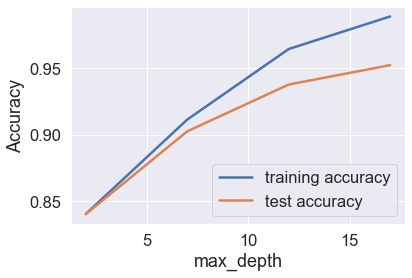

In [110]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_max_depth"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [111]:
# GridSearchCV to find optimal min_samples_leaf

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 10)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_leaf': range(50, 400, 10)},
             return_train_score=True, scoring='accuracy')

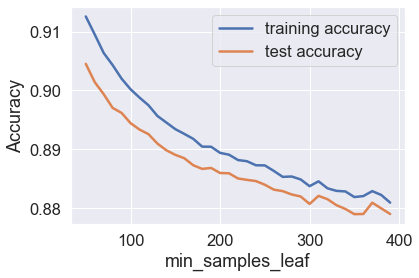

In [112]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [113]:
# GridSearchCV to find optimal min_samples_split

# specify number of folds for k-fold CV
n_folds = 5

# parameters to build the model on
parameters = {'min_samples_split': range(100, 500, 25)}

# instantiate the model
rf = RandomForestClassifier()


# fit tree on training data
rf = GridSearchCV(rf, parameters, 
                    cv=n_folds, 
                   scoring="accuracy",return_train_score=True)
rf.fit(X_lasso, y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'min_samples_split': range(100, 500, 25)},
             return_train_score=True, scoring='accuracy')

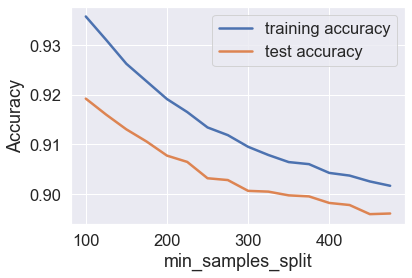

In [114]:
# scores of GridSearch CV
scores = rf.cv_results_

# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], 
         scores["mean_train_score"], 
         label="training accuracy")
plt.plot(scores["param_min_samples_split"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [115]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 300, 100),
    'min_samples_split': range(200, 500, 100),
    'n_estimators': [500,700], 
    'max_features': [10,20,25]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1,return_train_score=True)


In [116]:
# accuracy score
print ('Accuracy Score for Random Forest Final Model :',metrics.accuracy_score(y_test, prediction_test))

Accuracy Score for Random Forest Final Model : 0.9255638262415287


In [117]:
confuse_mterix = metrics.confusion_matrix(y_test, prediction_test)
print("Confusion Metrics :",confuse_mterix )

Confusion Metrics : [[7841  431]
 [ 239  490]]


In [118]:
# Substituting the value of true positive
TP = confuse_mterix[1,1]
# Substituting the value of true negatives
TN = confuse_mterix[0,0]
# Substituting the value of false positives
FP = confuse_mterix[0,1] 
# Substituting the value of false negatives
FN = confuse_mterix[1,0]

# Calculating the sensitivity
sensitivity=TP/(TP+FN)

# Calculating the specificity
specivicity=TN/(TN+FP)

print("Sensitivity:" ,sensitivity)
print("Specificity:" ,specivicity)

Sensitivity: 0.6721536351165981
Specificity: 0.9478965183752418


Insights:

- Local Incoming for Month 8, Average Revenue Per Customer for Month 8 and Max Recharge Amount for Month 8 are the most important predictor variables to predict churn.
- The results from random forest are very similar to that of the logistic regression and in line to what we had expected from our EDA

Summary
- Very Less Amount of High Value customers are churning which is a good service indicator
- Large number of Customers are new to Telecom Company, they fall under less than 5 Yrs Tenure- Std Outgoing Calls and Revenue Per Customer are strong indicators of Churn
- People with less than 4 Years of Tenure are more likely to Churn
- Behaviour of Volume Based Cost is not a strong indicator.
- Max Recharge Amount could be a good Churn Indicator.
- Random Forest is the best method to Predict Churn followed by SVM.
- Behaviour is 8 Month can be the base of Churn Analysis
- Local Incoming and Outgoing Calls for 8th Month and Average Revenue in 8th Month are strong indicators of Churn Behaviour